In [13]:
import pandas as pd

# Read the file
file_path = 'Datasets/3_Utrecht.txt'

# Read the general parameters line
with open(file_path, 'r') as file:
    general_params = file.readline().strip()

# Read the rest of the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

# Displaying the DataFrame
print("General Parameters:", general_params)
print("Delivery Data:")
df

General Parameters: 3000 2000 81 10000 1 200000
Delivery Data:


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
0,1795,1043,2296,1955,0,200000
1,144,1933,1934,467,0,200000
2,1700,833,10,1987,0,200000
3,1473,1815,2821,810,0,200000
4,1372,478,1210,150,0,200000
...,...,...,...,...,...,...
9995,2039,1389,398,1738,0,200000
9996,2659,958,317,1990,0,200000
9997,1161,957,2880,232,0,200000
9998,2167,374,217,790,0,200000


In [2]:
import pandas as pd

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df, sleds, T):
    routes = [[] for _ in range(sleds)]
    unvisited = df.index.tolist()

    for i in range(sleds):
        if unvisited:
            current_point = (df.loc[unvisited[0], 'Start_Horizontal'], df.loc[unvisited[0], 'Start_Vertical'])
            routes[i].append(current_point)
            unvisited.remove(unvisited[0])

            while unvisited:
                nearest_point, nearest_idx = None, None
                min_distance = float('inf')

                for idx in unvisited:
                    next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
                    distance = calculate_distance(current_point, next_point)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_point = next_point
                        nearest_idx = idx

                if nearest_point and calculate_distance(current_point, nearest_point) + len(routes[i]) <= T:
                    current_point = nearest_point
                    routes[i].append(current_point)
                    unvisited.remove(nearest_idx)
                else:
                    break

    return routes

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
H, V, S, P, B, T = general_params
routes = nearest_neighbor_route(df, S, T)
for i, route in enumerate(routes):
    print(f"Route for Sled {i+1}: {route}")


Route for Sled 1: [(395, 43), (385, 37), (357, 20), (348, 7), (310, 10), (311, 1), (311, 37), (296, 47), (277, 50), (266, 66), (275, 87), (243, 102), (229, 110), (210, 150), (234, 186), (219, 215), (216, 217), (258, 224), (291, 207), (324, 207), (319, 195), (310, 163), (332, 100), (400, 136), (427, 128), (468, 106), (481, 80), (480, 43), (426, 66), (423, 12), (528, 3), (544, 27), (582, 50), (583, 59), (601, 45), (625, 46), (621, 39), (597, 94), (557, 123), (559, 126), (540, 111), (511, 139), (502, 138), (498, 128), (495, 147), (471, 167), (468, 170), (506, 215), (517, 208), (528, 267), (552, 276), (558, 292), (558, 342), (557, 342), (524, 323), (497, 303), (495, 283), (482, 285), (449, 270), (432, 268), (400, 309), (378, 301), (362, 356), (345, 370), (379, 411), (426, 438), (432, 467), (474, 470), (481, 487), (500, 484), (525, 464), (517, 426), (530, 416), (534, 379), (584, 384), (637, 404), (623, 425), (631, 440), (635, 475), (648, 494), (613, 505), (593, 508), (582, 461), (587, 566),

In [4]:
df.sort_values(by=['Start_Horizontal','Start_Vertical'])


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
296,3,203,346,877,721,3756
248,6,455,131,145,17131,18161
281,20,131,10,783,9134,10135
58,23,441,207,732,4790,5727
14,31,325,197,802,11368,12202
...,...,...,...,...,...,...
162,784,431,379,158,3227,5074
257,787,556,533,18,23346,24893
137,789,421,463,561,5017,6337
11,790,935,686,121,12617,14630


In [1]:
%pip install networkx
%pip install tk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


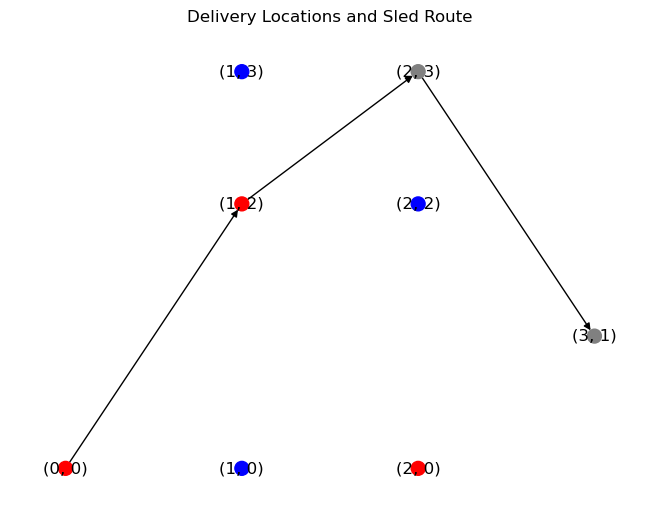

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=100, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/1_Geldermalsen.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


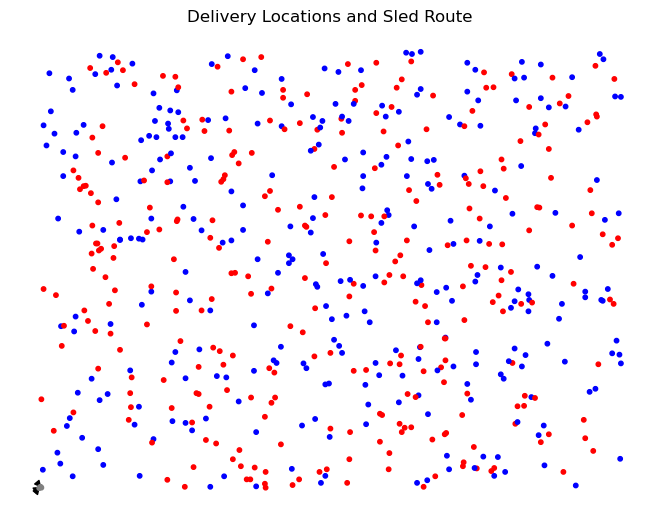

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_size=10, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


In [5]:
import pandas as pd

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df):
    # Starting at the first delivery point
    current_point = (df.iloc[0]['Start_Horizontal'], df.iloc[0]['Start_Vertical'])
    unvisited = df.index.tolist()[1:]  # All points except the starting point
    route = [current_point]

    # Iterate until all points are visited
    while unvisited:
        nearest_point, nearest_idx = None, None
        min_distance = float('inf')

        # Find the nearest unvisited point
        for idx in unvisited:
            next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
            distance = calculate_distance(current_point, next_point)
            if distance < min_distance:
                min_distance = distance
                nearest_point = next_point
                nearest_idx = idx

        # Update the current point and mark as visited
        current_point = nearest_point
        route.append(current_point)
        unvisited.remove(nearest_idx)

    return route

# Example usage
# df = pd.DataFrame(...)  # Your DataFrame here
route = nearest_neighbor_route(df)
print("Route:", route)


NameError: name 'df' is not defined

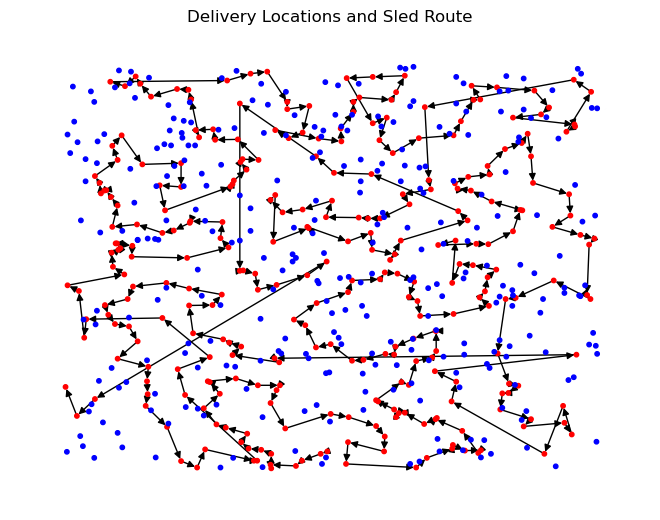

In [17]:
plot_route(df, route)

In [23]:
counter = 0
for route in routes:
    counter+=1
print(counter)

100


In [3]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def read_submission_file(file_path):
    with open(file_path, 'r') as file:
        sled_routes = {}
        for index, line in enumerate(file):
            parts = line.split()
            sled_routes[f'Sled {index + 1}'] = [int(x) for x in parts[1:]] # Assuming delivery numbers are integers
        return sled_routes

def plot_route(sled_number):
    # Placeholder for route plotting logic
    # Here you would retrieve and plot the route of the selected sled
    print(f"Plotting route for {sled_number}")

# GUI Setup
root = tk.Tk()
root.title("Sled Route Viewer")

sled_routes = read_submission_file('santa_submission.txt')
sled_numbers = list(sled_routes.keys())

# Dropdown for selecting a sled
selected_sled = tk.StringVar()
sled_dropdown = ttk.Combobox(root, textvariable=selected_sled, values=sled_numbers)
sled_dropdown.grid(column=0, row=0)

# Button to plot route
plot_button = tk.Button(root, text="Plot Route", command=lambda: plot_route(selected_sled.get()))
plot_button.grid(column=1, row=0)

root.mainloop()


In [2]:
def create_submission_file(sledges_deliveries, file_name):
    with open(file_name, 'w') as file:
        for deliveries in sledges_deliveries:
            # Number of deliveries for this sledge
            M = len(deliveries)
            # Delivery numbers
            delivery_numbers = ' '.join(map(str, deliveries))
            # Write to file
            file.write(f"{M} {delivery_numbers}\n")

# Example usage
sledges_deliveries = [
    [0, 1, 3],    # Deliveries assigned to the first sledge
    [2, 4, 5, 6], # Deliveries assigned to the second sledge
    [7, 8]        # Deliveries assigned to the third sledge
]

create_submission_file(sledges_deliveries, 'santa_submission.txt')

In [22]:
import pandas as pd
import numpy as np


# Read the file
file_path = 'Datasets/2_Delft.txt'

# Read the general parameters line
with open(file_path, 'r') as file:
    general_params = file.readline()
    general_paramslist = general_params.split(" ")


horizontal_streets = int(general_paramslist[0])
vertical_street = int(general_paramslist[1])
no_sledges = int(general_paramslist[2])
no_presents = int(general_paramslist[3])
bonus_per_ride = int(general_paramslist[4])
no_steps = int(general_paramslist[5]) 



class Present:
    def __init__(self, a, b, x, y, s, f):
        self.starthor = a
        self.startver = b
        self.finhor = x
        self.finver = y
        self.devtime = s
        self.fintime = f

class Sledge:
    def __init__(self):
        self.no_pres_deliv = 0
        self.no_steps_taken = 0
        self.pres_deliv = []
        self.current_hor = 0
        self.current_ver = 0

    def add_present(self, p):
        self.no_pres_deliv += 1
        self.no_steps_taken += (abs(self.current_hor - p.starthor) + abs(self.current_ver - p.startver) + 
                                abs(p.starthor - p.finhor) + abs(p.startver - p.finver))
        self.pres_deliv.append(p)
        self.current_hor, self.current_ver = p.finhor, p.finver

def nearest_neighbor_route(df, sledges):
    unvisited = [Present(row['Start_Horizontal'], row['Start_Vertical'], row['Finish_Horizontal'], 
                         row['Finish_Vertical'], row['Earliest_Start'], row['Latest_Finish']) for index, row in df.iterrows()]

    for sledge in sledges:
        while unvisited:
            nearest_present, nearest_idx = None, None
            min_distance = float('inf')

            # Find the nearest unvisited present
            for idx, present in enumerate(unvisited):
                distance = abs(sledge.current_hor - present.starthor) + abs(sledge.current_ver - present.startver)
                if distance < min_distance:
                    min_distance = distance
                    nearest_present = present
                    nearest_idx = idx

            if nearest_present:
                sledge.add_present(nearest_present)
                del unvisited[nearest_idx]

# Example usage
# Read the rest of the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', skiprows=0, header=None)
df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']



# Create sledges
sledges = [Sledge() for _ in range(no_sledges)]

# Run the nearest neighbor algorithm
nearest_neighbor_route(df, sledges)

# Print the routes for each sledge
for i, sledge in enumerate(sledges):
    print(f"Sledge {i+1}:")
    for present in sledge.pres_deliv:
        print(f"  Deliver from ({present.starthor}, {present.startver}) to ({present.finhor}, {present.finver})")


Sledge 1:
  Deliver from (20, 131) to (10, 783)
  Deliver from (73, 801) to (159, 839)
  Deliver from (198, 840) to (478, 635)
  Deliver from (474, 621) to (723, 872)
  Deliver from (715, 879) to (347, 44)
  Deliver from (357, 20) to (505, 713)
  Deliver from (508, 681) to (180, 701)
  Deliver from (176, 699) to (774, 428)
  Deliver from (784, 431) to (379, 158)
  Deliver from (400, 136) to (569, 558)
  Deliver from (561, 555) to (125, 269)
  Deliver from (127, 253) to (521, 295)
  Deliver from (524, 323) to (593, 202)
  Deliver from (588, 216) to (166, 751)
  Deliver from (176, 758) to (638, 250)
  Deliver from (650, 286) to (462, 484)
  Deliver from (481, 487) to (452, 191)
  Deliver from (468, 170) to (393, 237)
  Deliver from (432, 268) to (46, 910)
  Deliver from (70, 960) to (521, 212)
  Deliver from (517, 208) to (599, 956)
  Deliver from (611, 950) to (405, 339)
  Deliver from (400, 309) to (6, 829)
  Deliver from (87, 827) to (77, 946)
  Deliver from (92, 949) to (494, 860)
  

In [21]:
import pandas as pd

def process_file(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Extract general parameters
    H, V, no_sledges, P, B, T = general_params

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    # Create sledges
    sledges = [Sledge() for _ in range(no_sledges)]

    # Run the nearest neighbor algorithm
    nearest_neighbor_route(df, sledges)

    # Print the routes for each sledge
    for i, sledge in enumerate(sledges):
        print(f"Sledge {i+1} in {file_path}:")
        for present in sledge.pres_deliv:
            print(f"  Deliver from ({present.starthor}, {present.startver}) to ({present.finhor}, {present.finver})")
    print("\n")

# List of file paths
file_paths = ['Datasets/5_Amsterdam.txt']

# Process each file
for file_path in file_paths:
    process_file(file_path)


Sledge 1 in Datasets/5_Amsterdam.txt:
  Deliver from (29, 6) to (929, 1549)
  Deliver from (933, 1560) to (511, 639)
  Deliver from (492, 646) to (449, 748)
  Deliver from (444, 735) to (915, 975)
  Deliver from (904, 970) to (1228, 1533)
  Deliver from (1229, 1518) to (358, 1624)
  Deliver from (347, 1625) to (641, 1702)
  Deliver from (644, 1703) to (619, 468)
  Deliver from (619, 456) to (129, 1159)
  Deliver from (142, 1155) to (238, 1590)
  Deliver from (246, 1597) to (1102, 1347)
  Deliver from (1095, 1349) to (608, 57)
  Deliver from (609, 65) to (906, 1845)
  Deliver from (904, 1844) to (637, 492)
  Deliver from (636, 486) to (1198, 263)
  Deliver from (1191, 246) to (168, 1193)
  Deliver from (173, 1195) to (709, 64)
  Deliver from (708, 57) to (1235, 110)
  Deliver from (1238, 102) to (864, 388)
  Deliver from (867, 397) to (1269, 1391)
  Deliver from (1270, 1423) to (270, 1177)
  Deliver from (271, 1176) to (973, 1041)
  Deliver from (965, 1024) to (375, 1814)
  Deliver from

In [25]:
%pip install scipy

     ---------------------------------------- 44.3/44.3 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


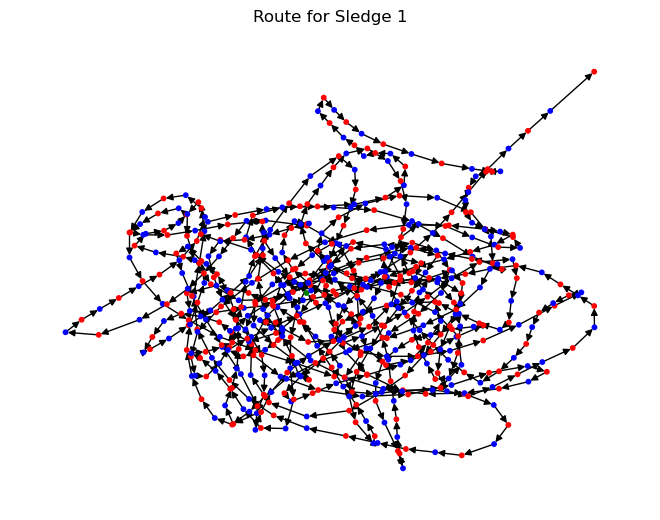

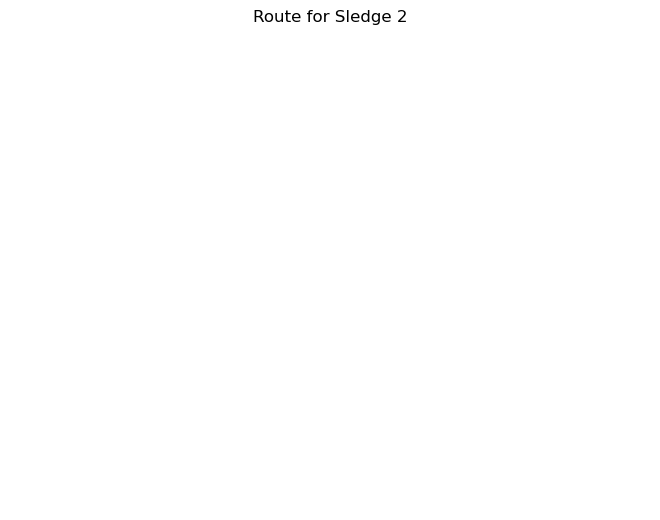

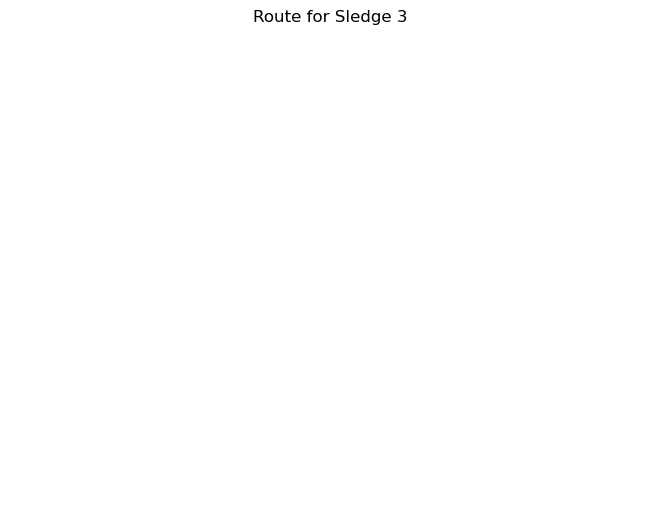

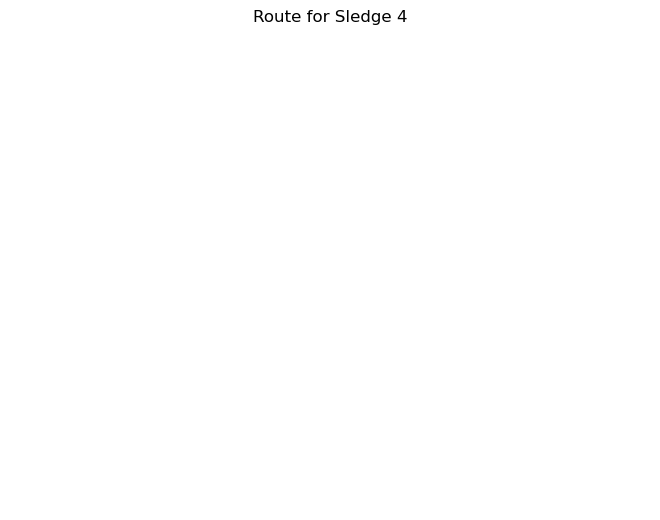

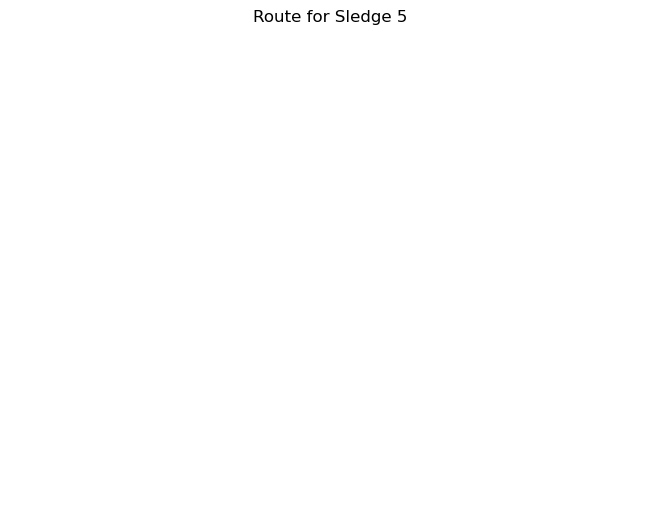

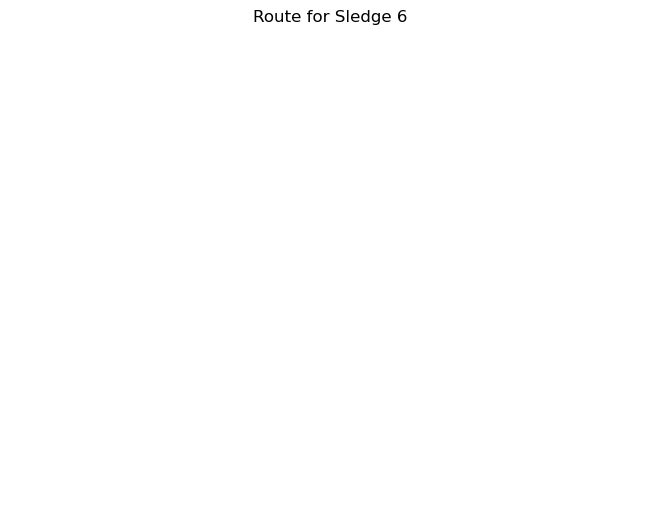

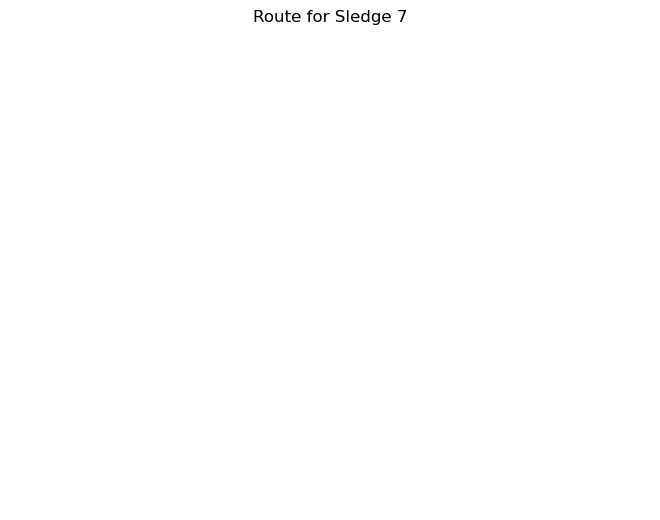

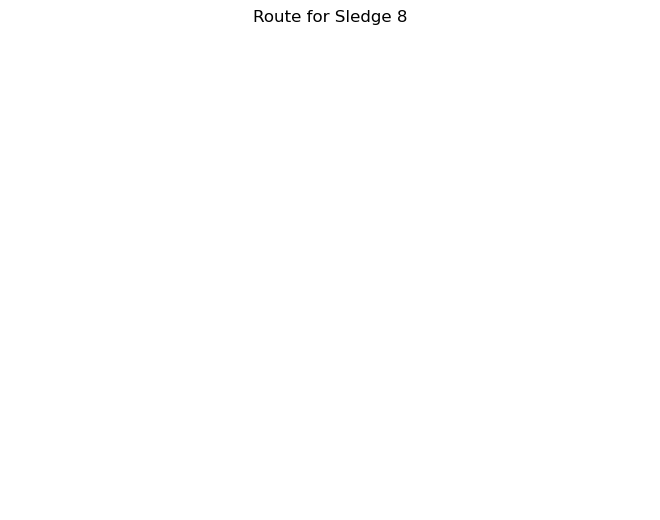

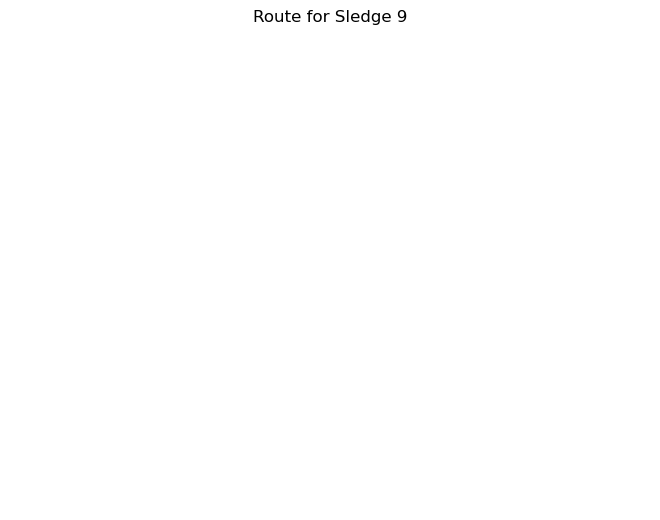

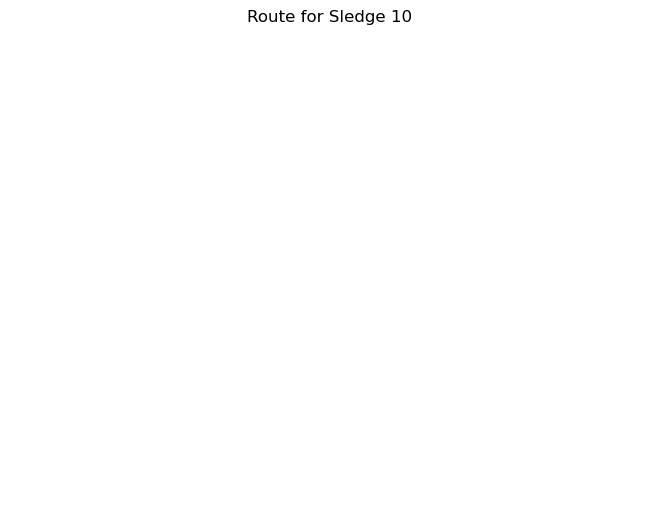

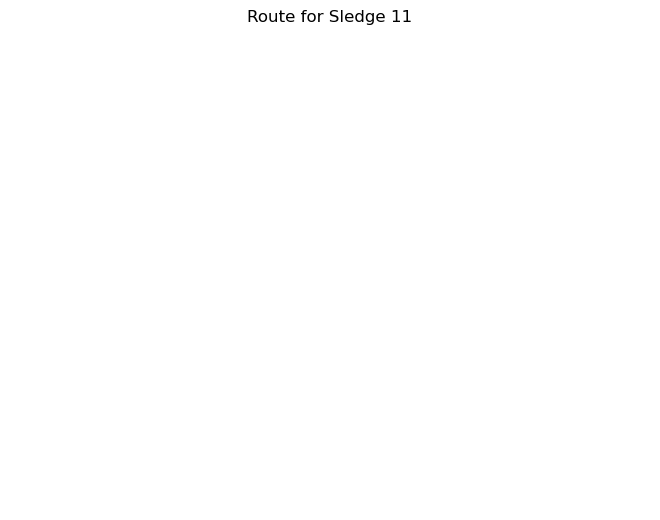

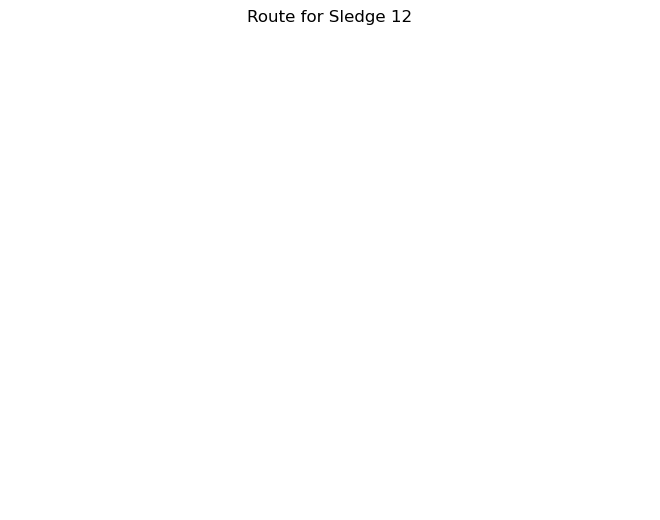

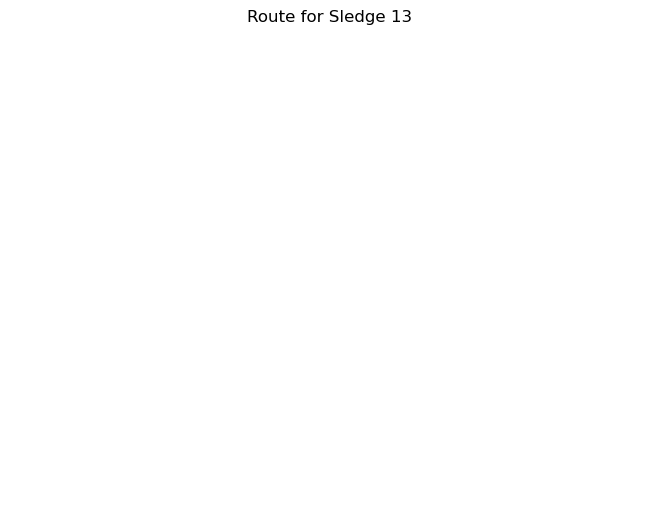

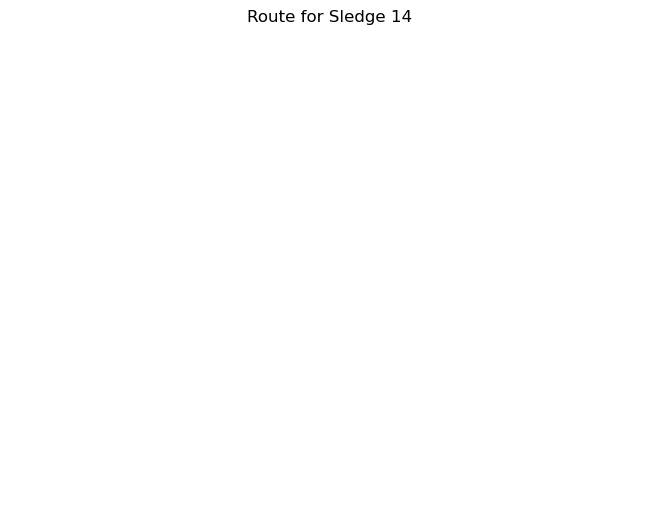

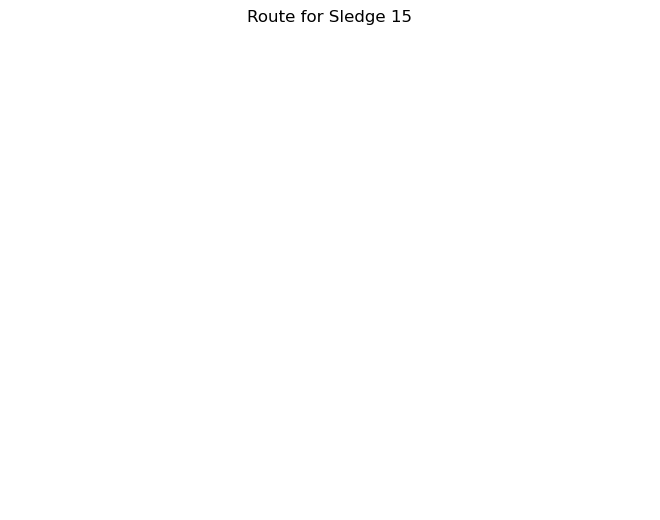

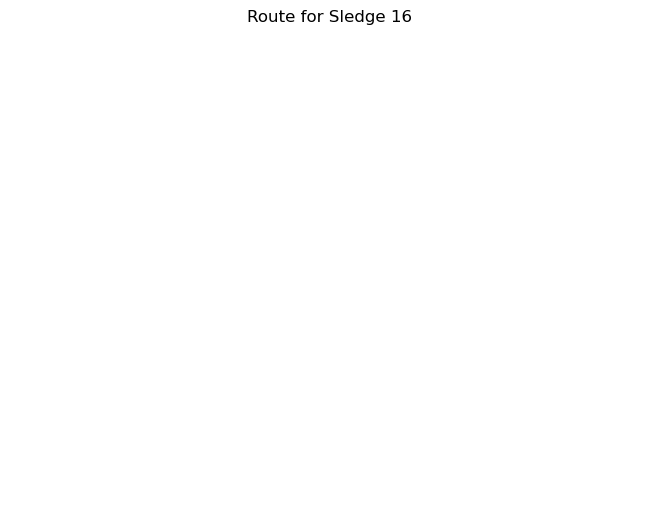

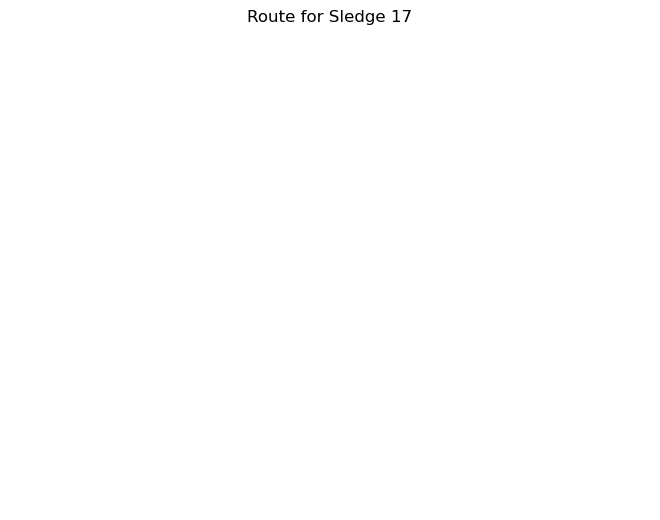

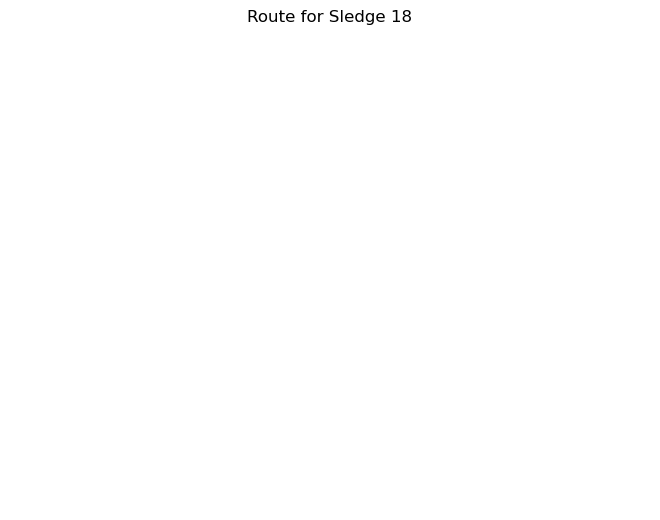

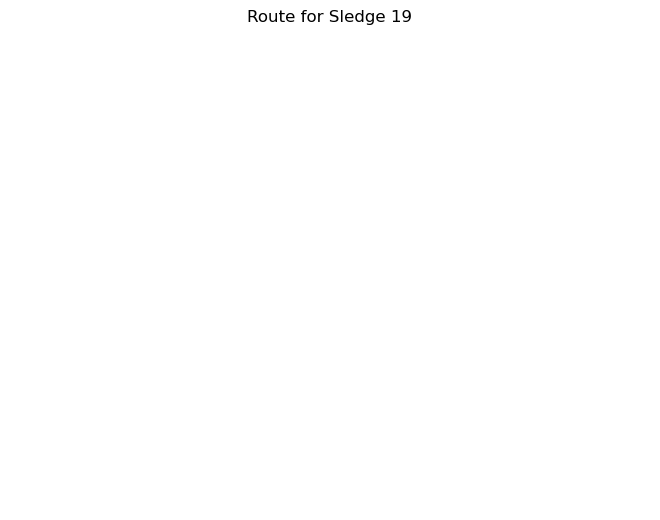

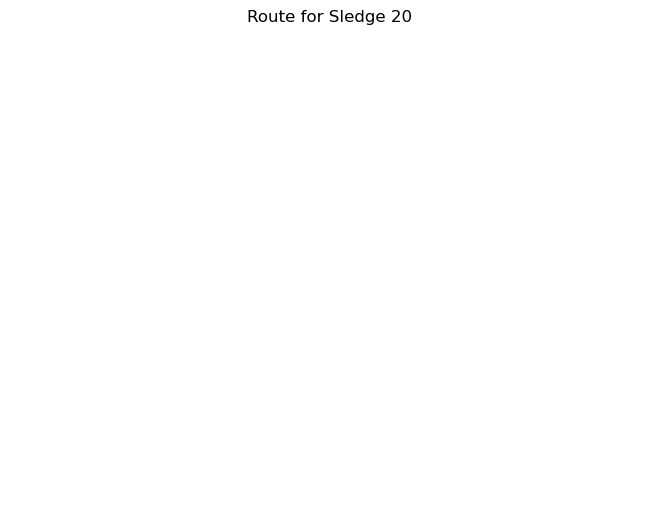

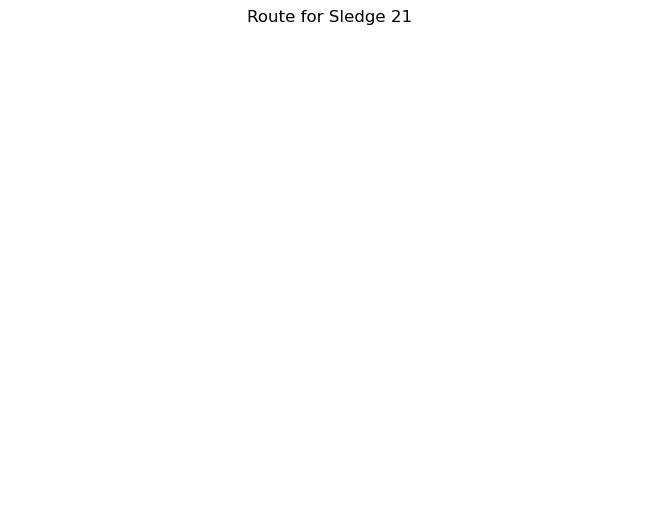

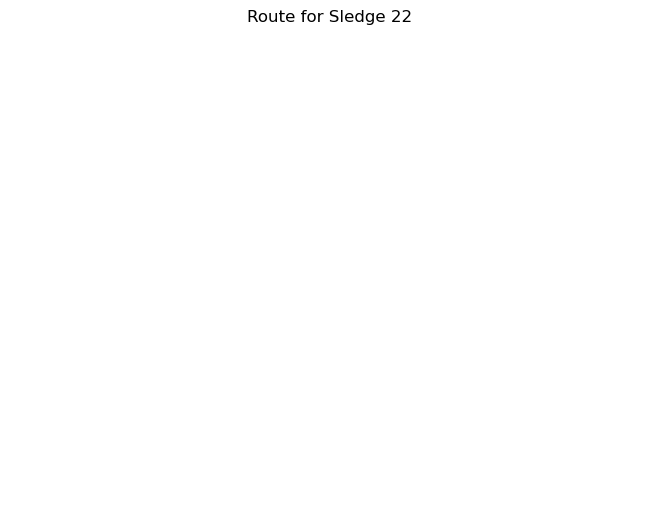

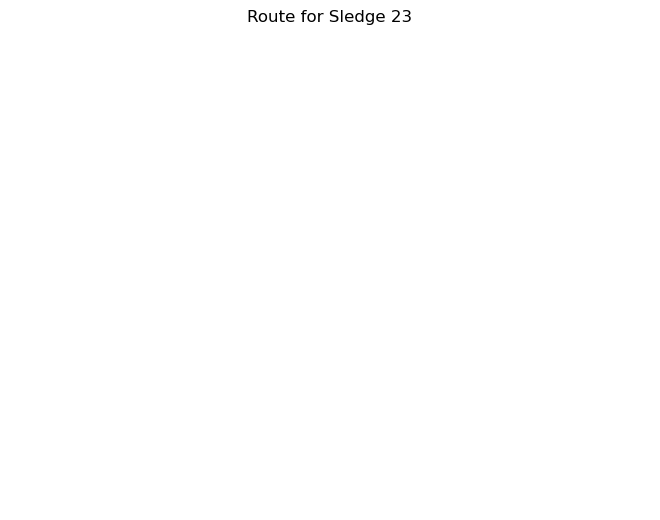

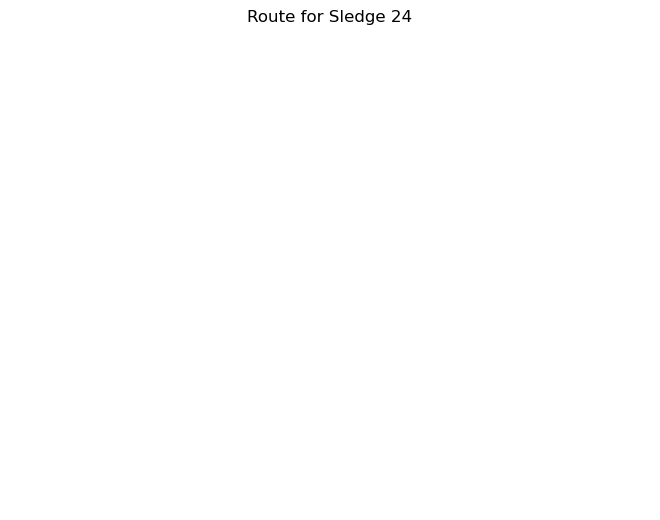

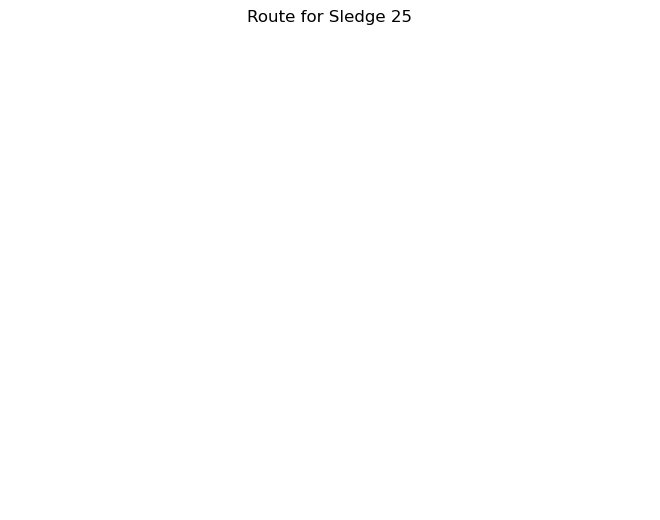

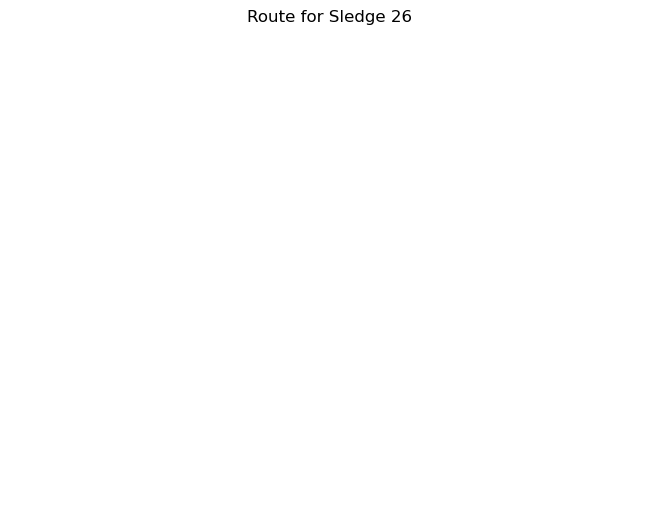

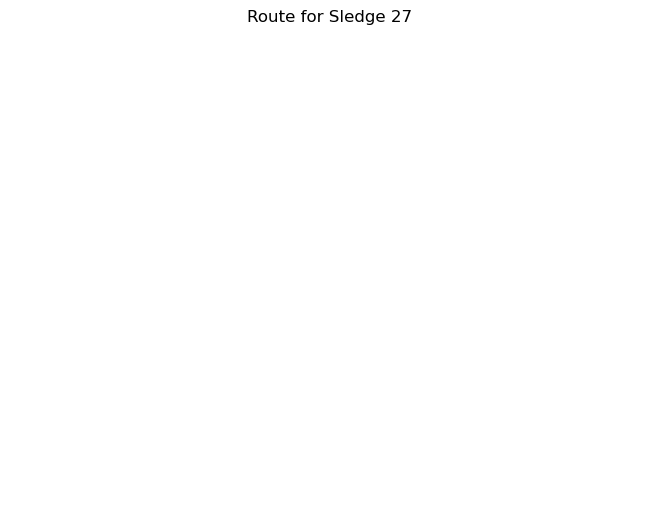

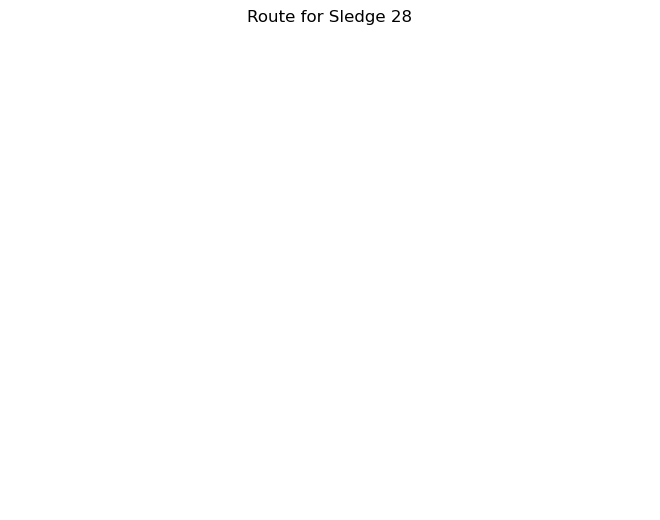

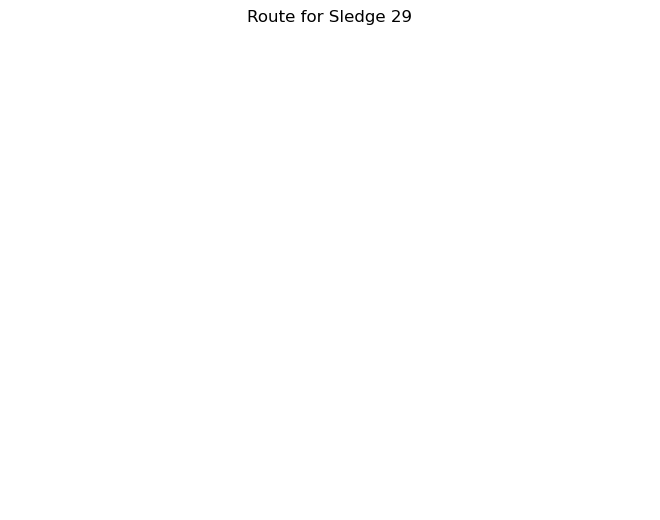

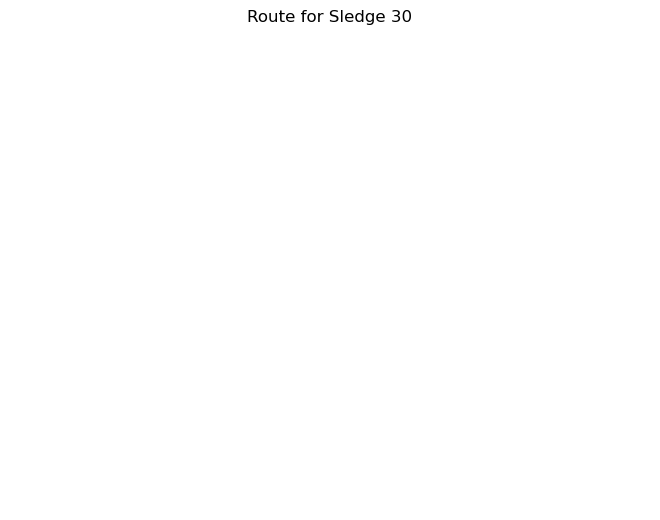

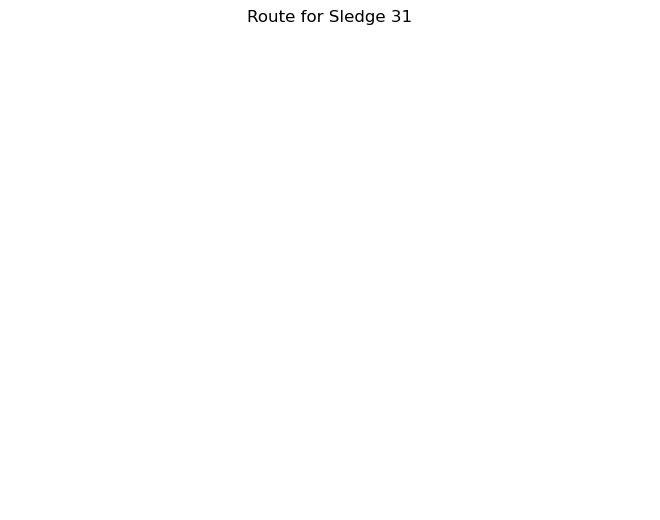

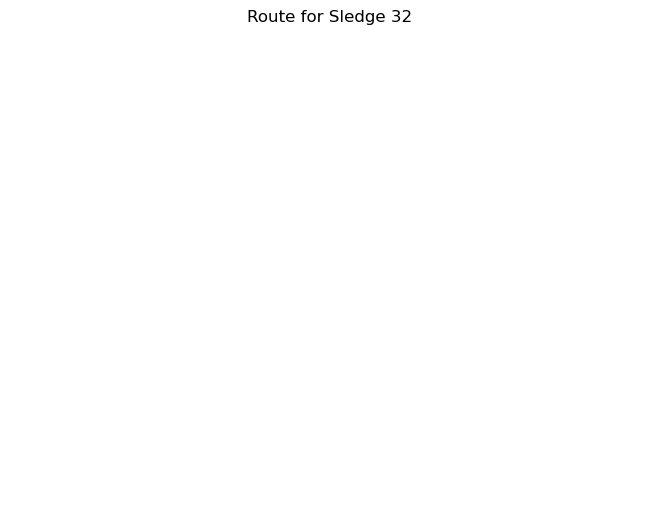

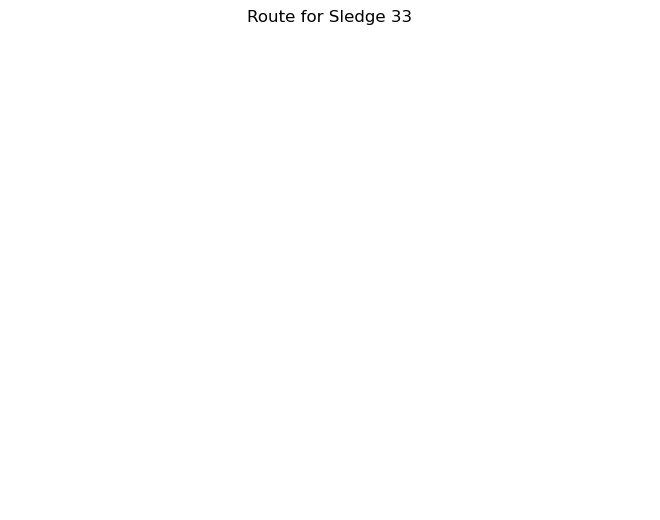

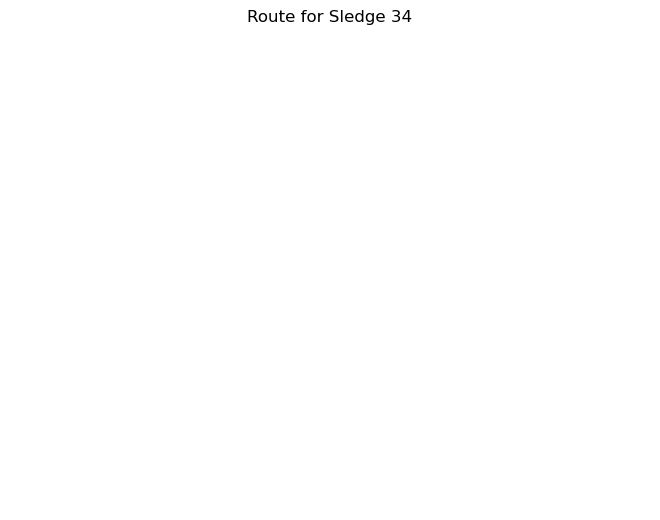

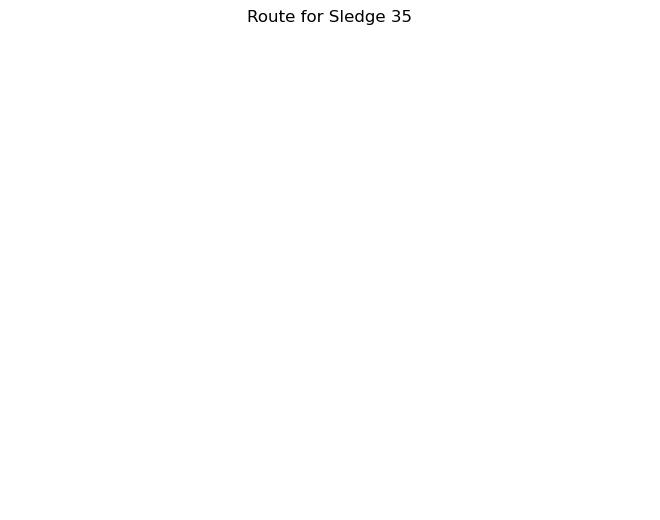

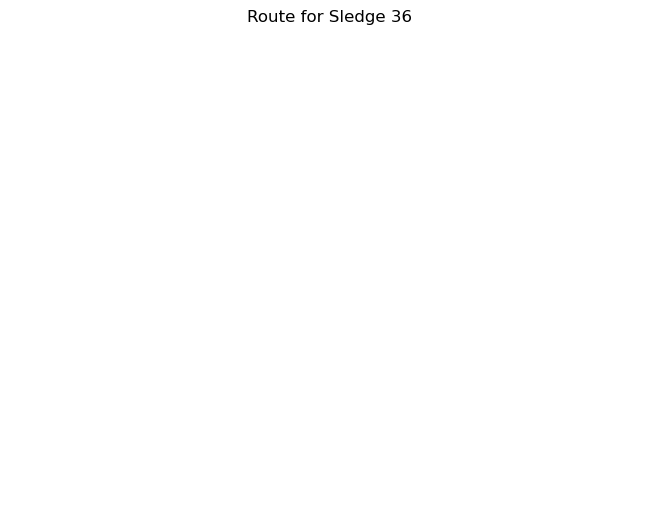

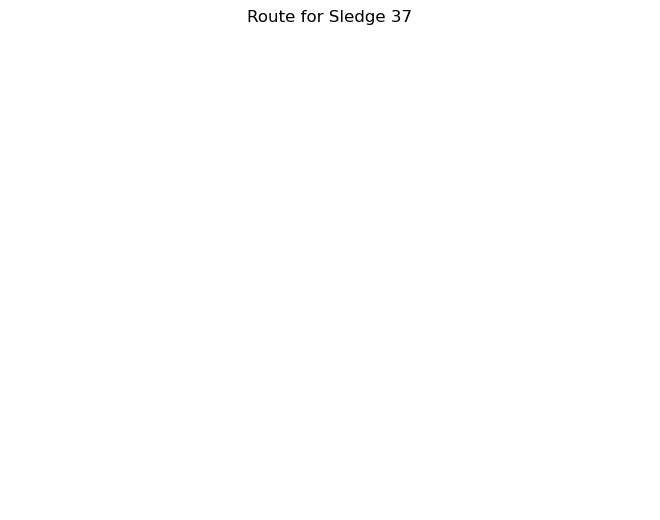

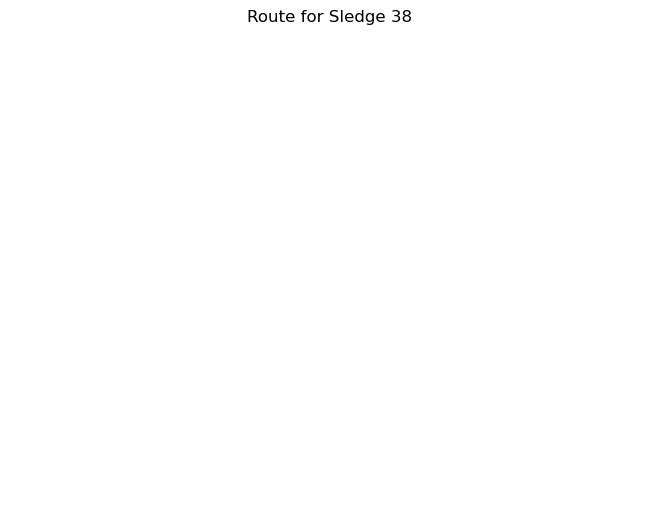

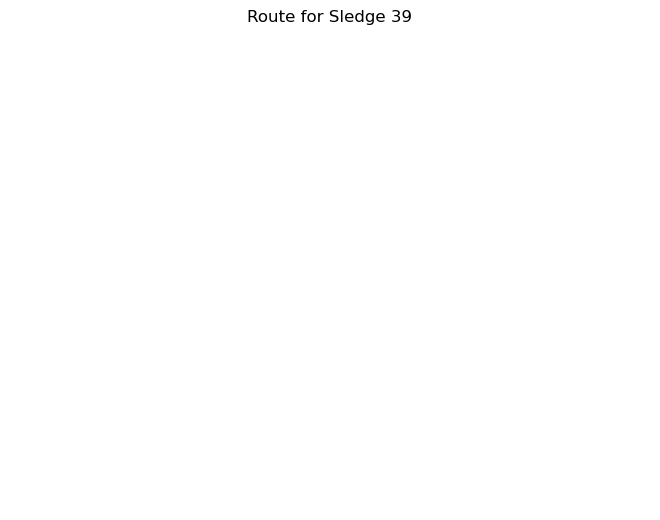

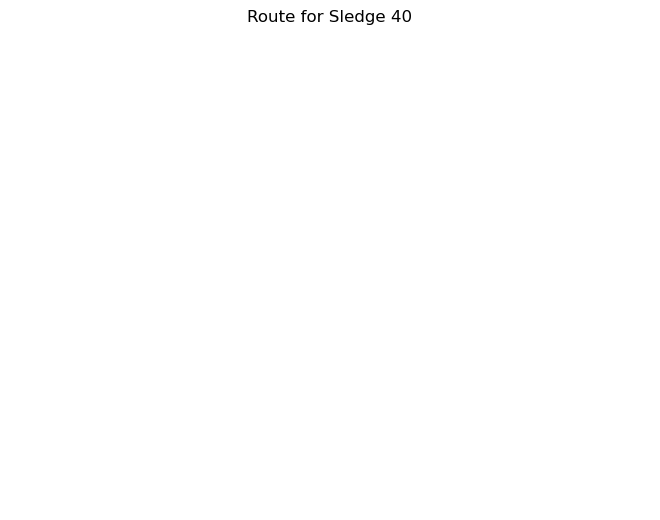

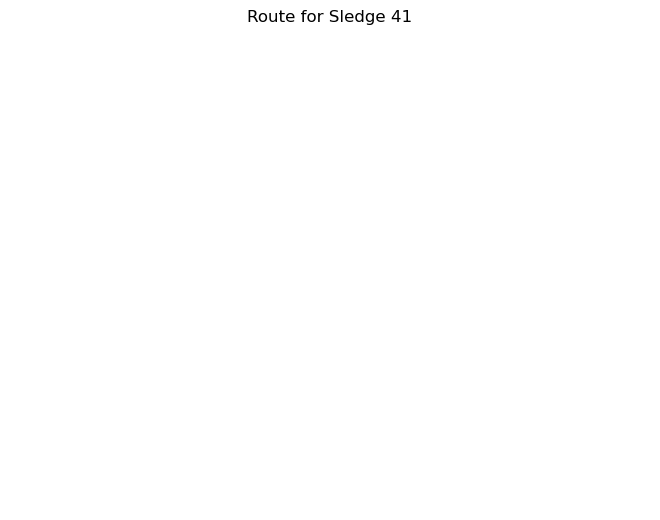

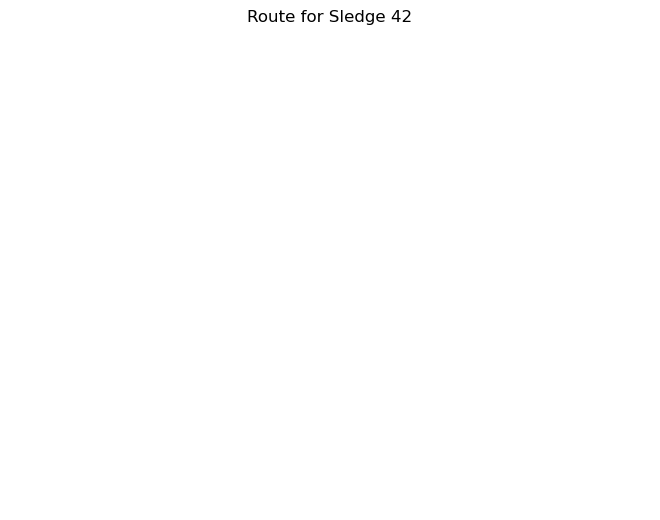

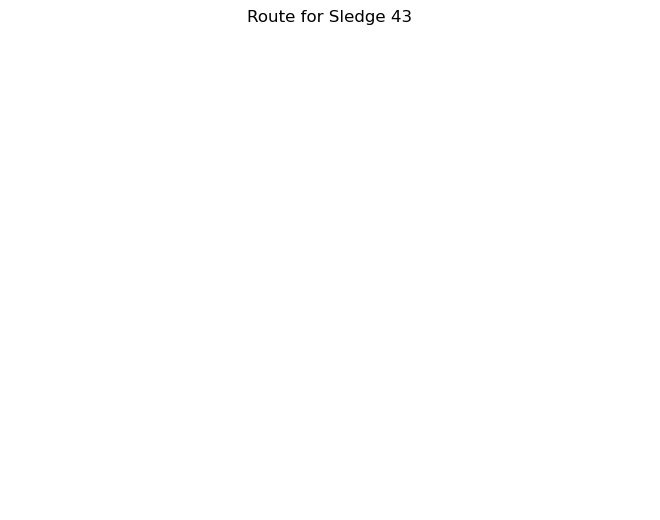

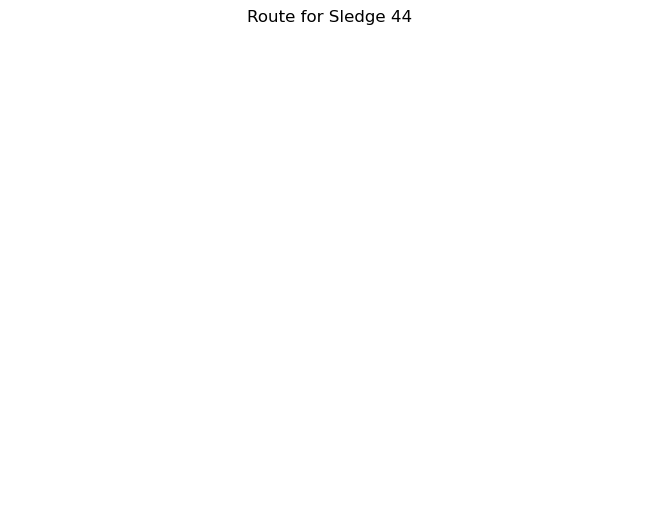

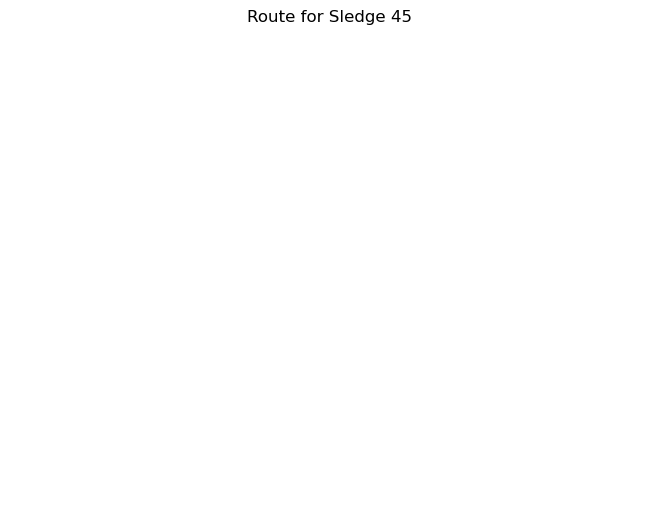

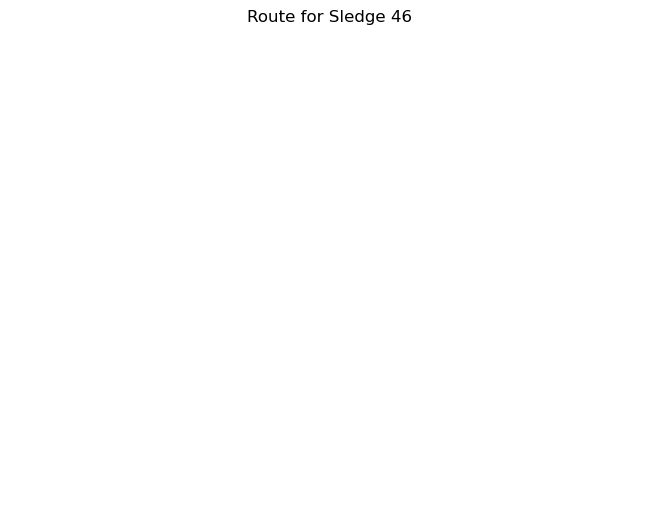

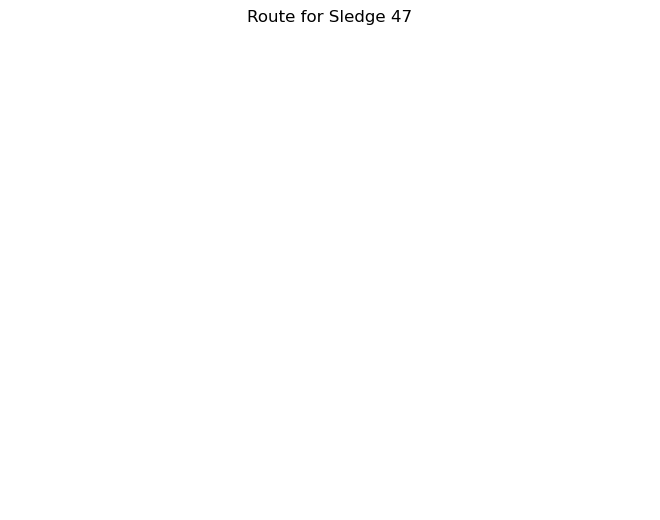

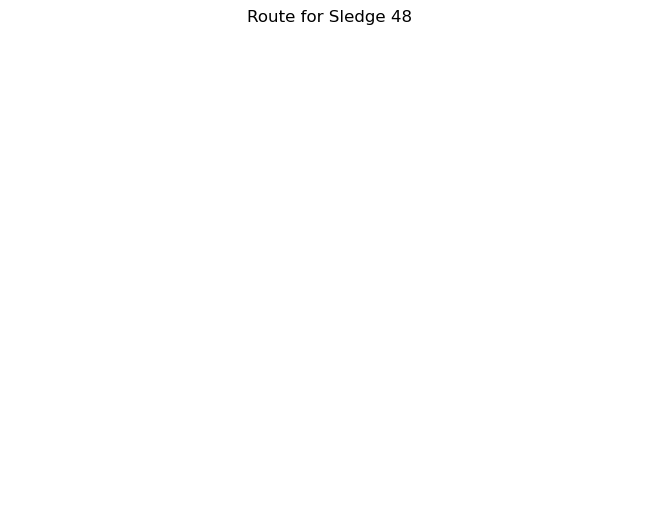

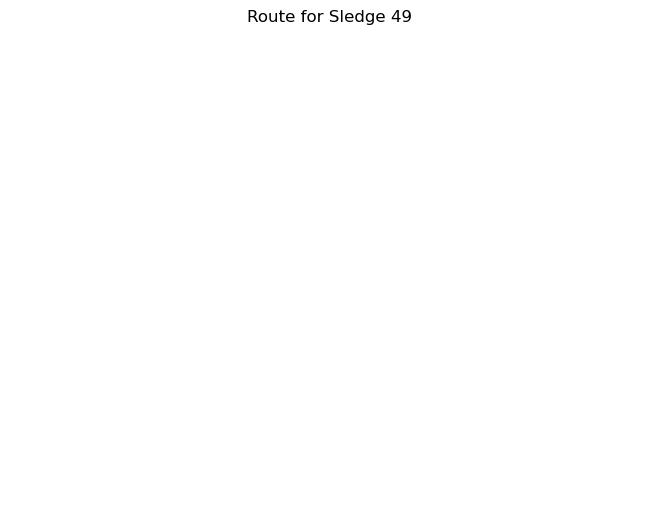

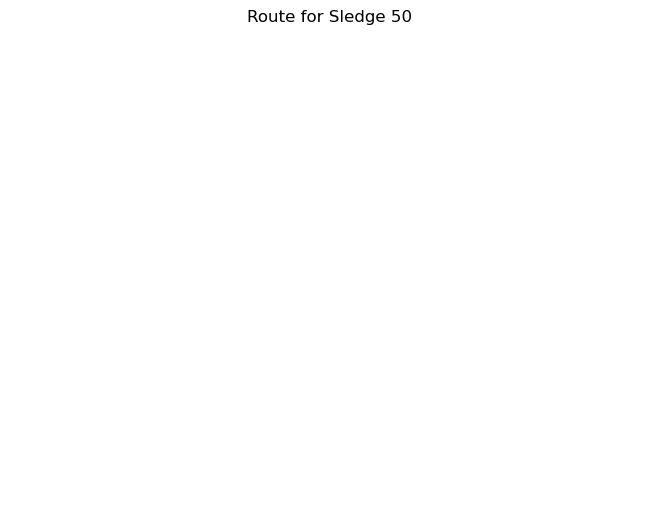

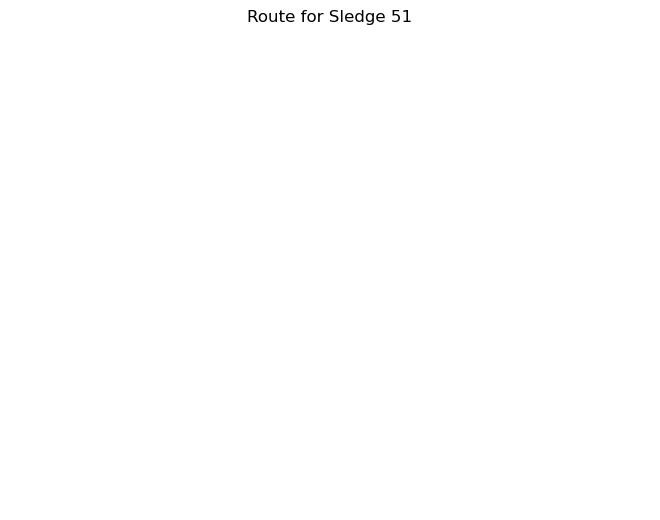

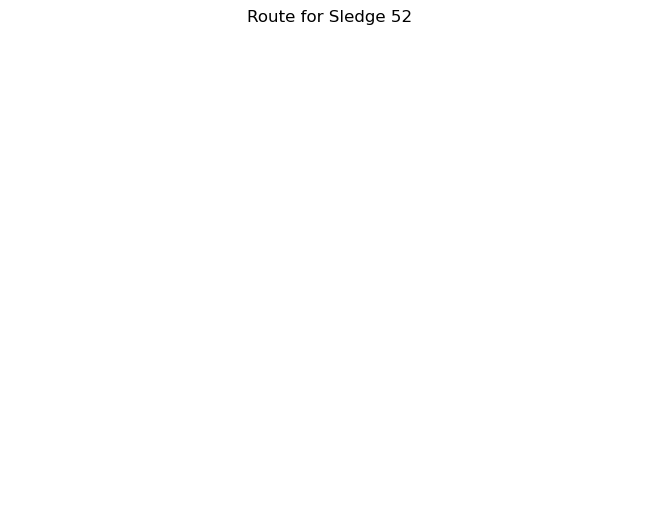

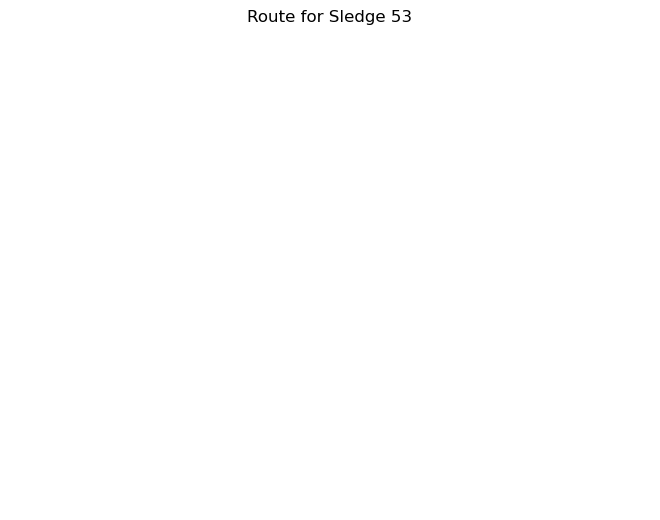

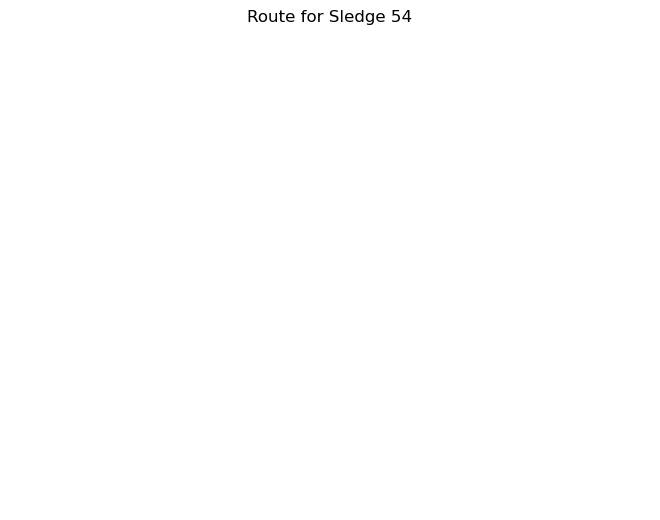

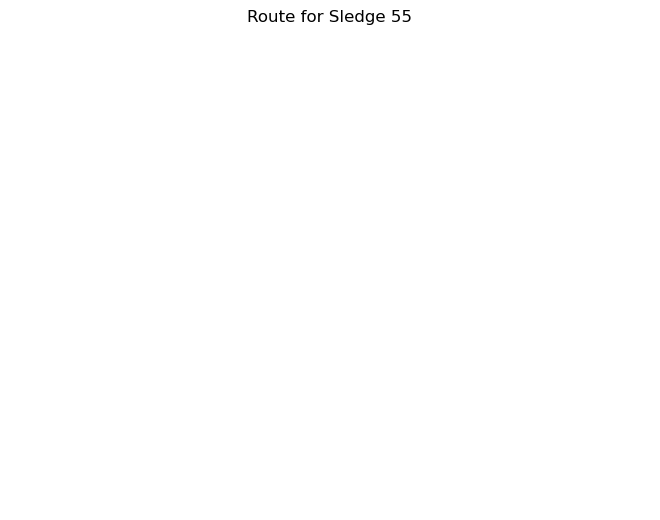

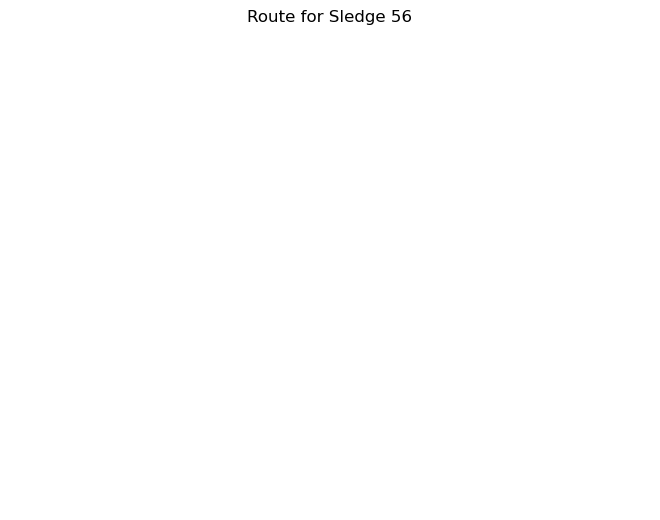

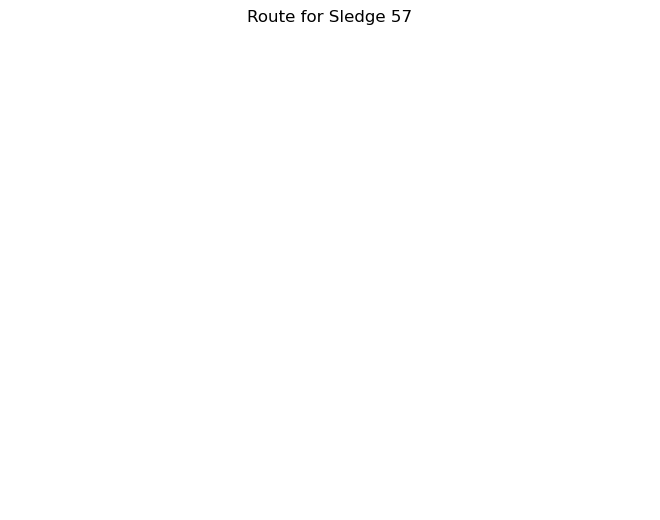

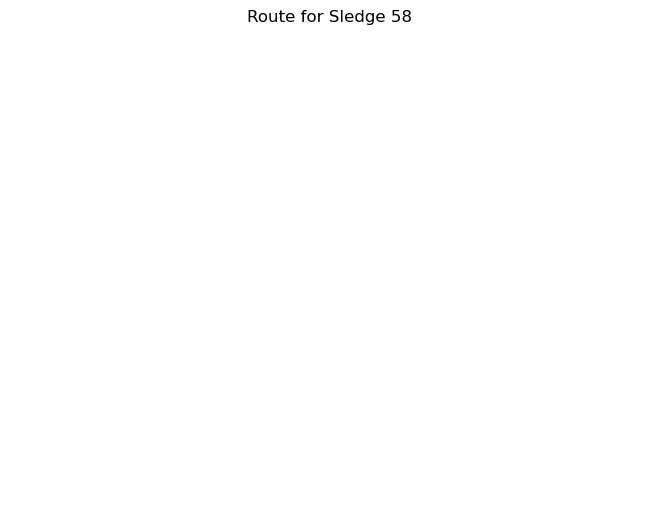

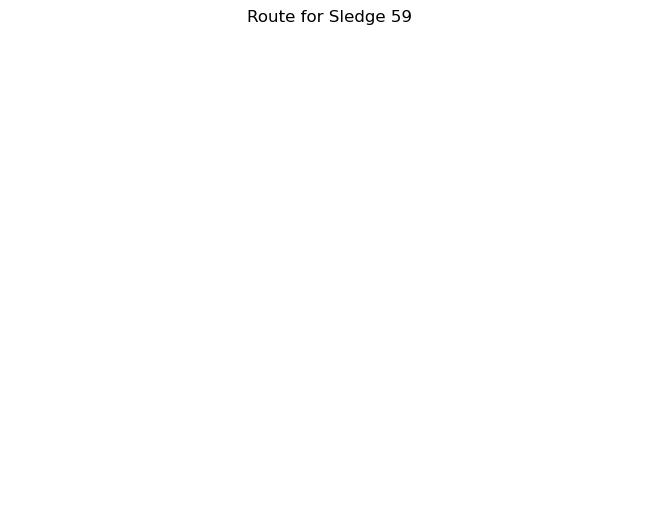

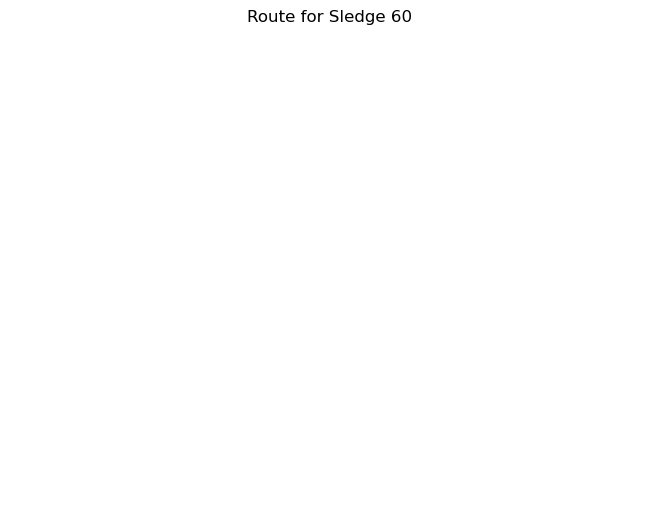

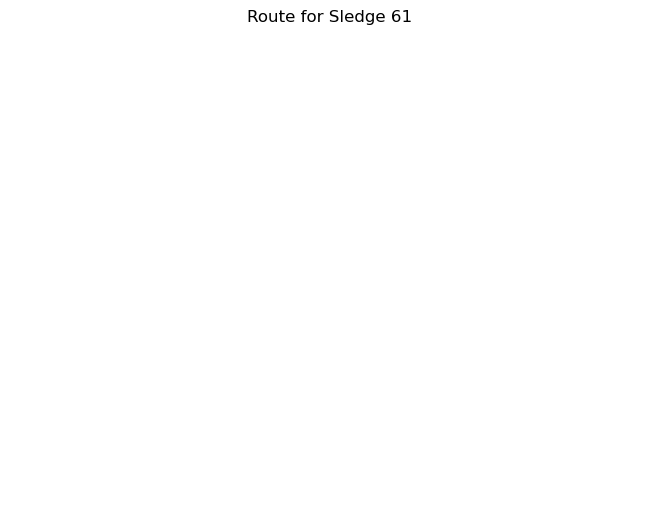

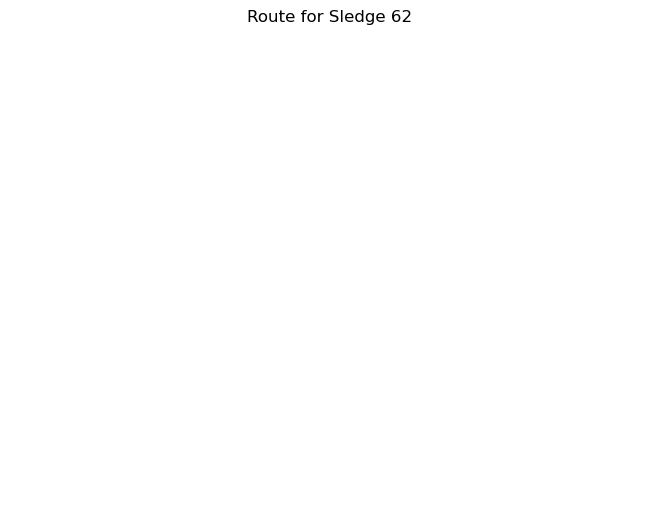

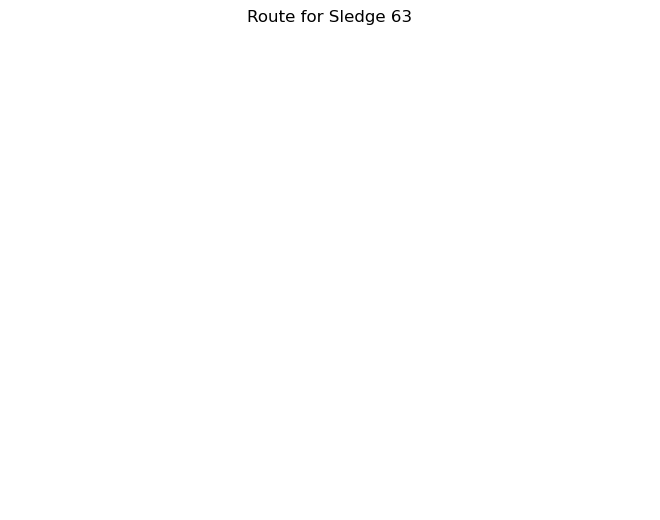

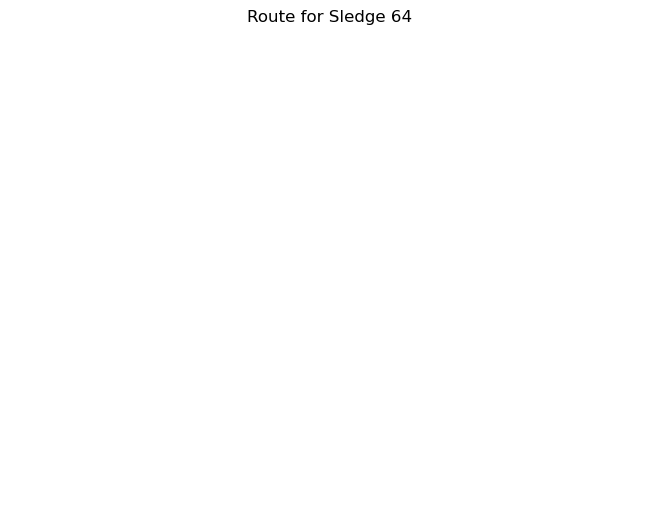

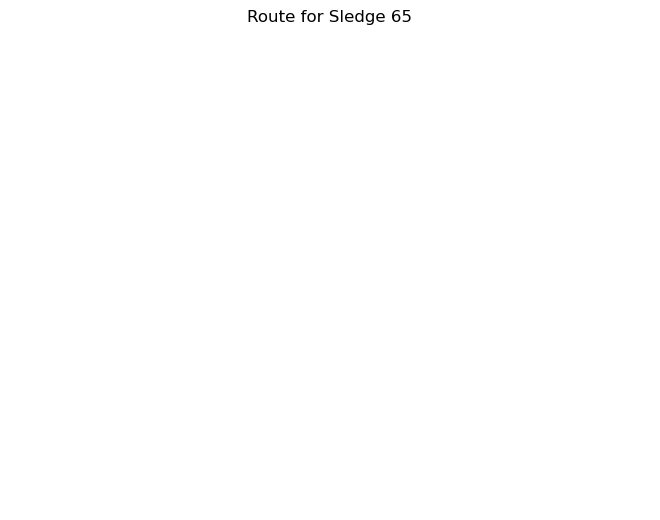

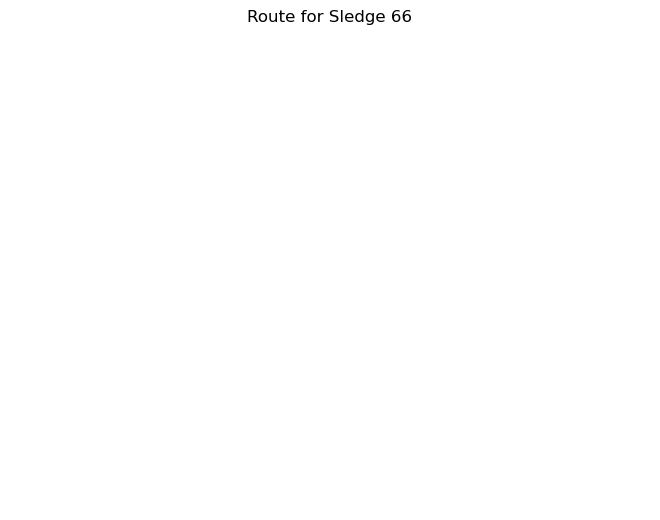

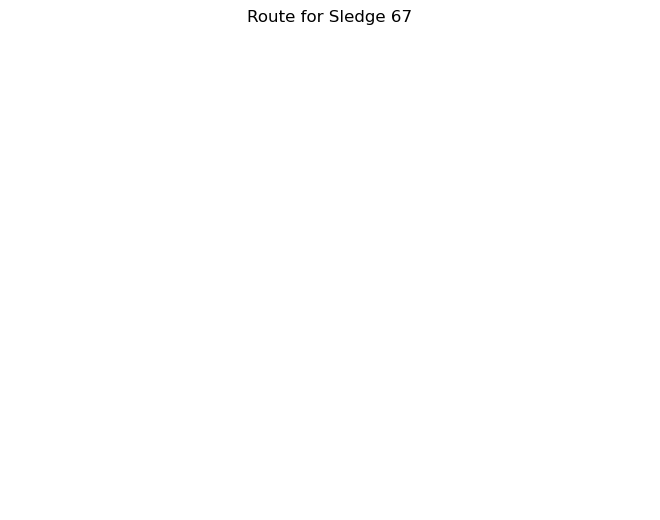

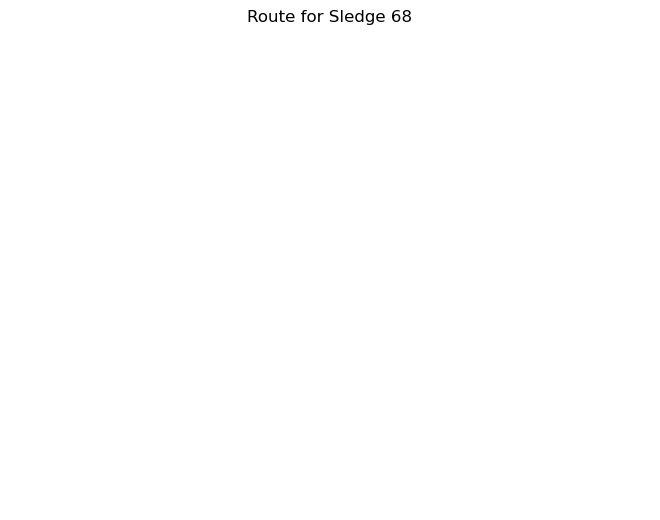

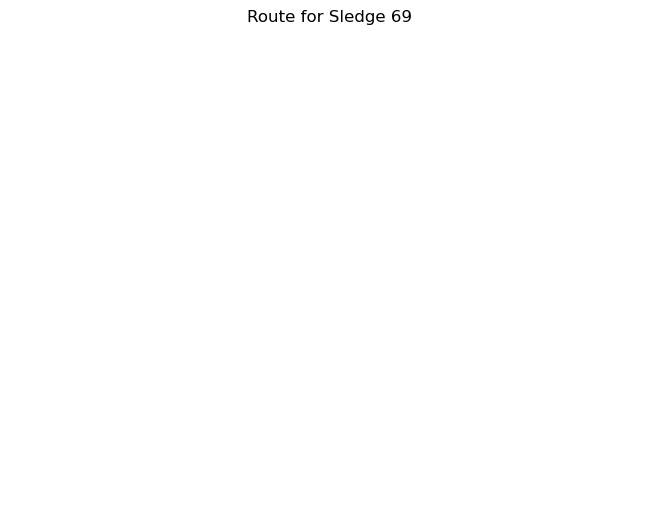

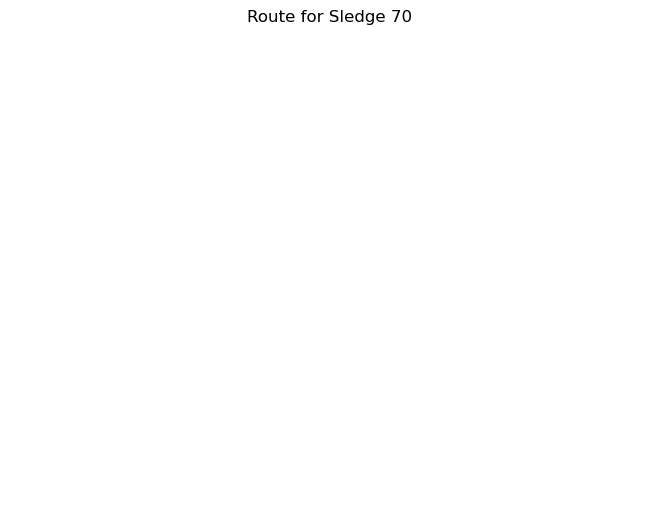

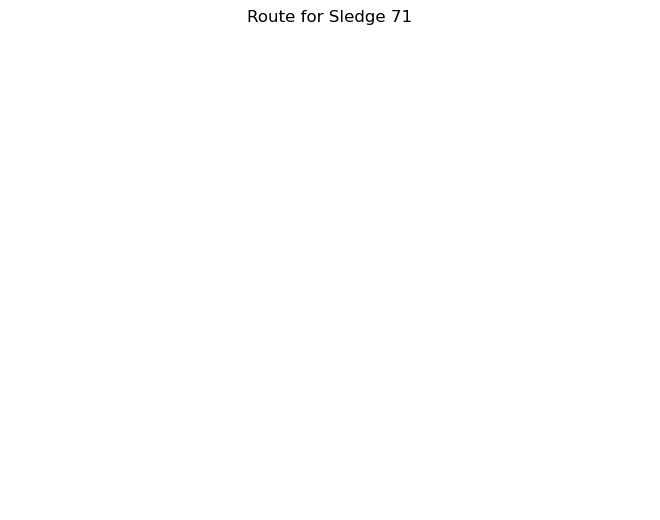

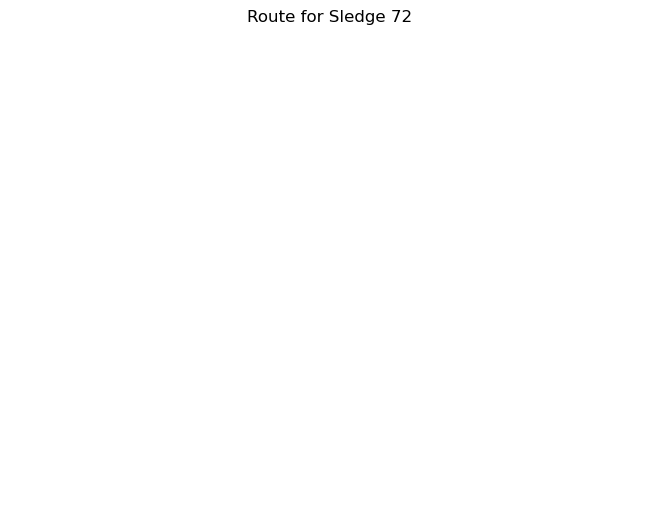

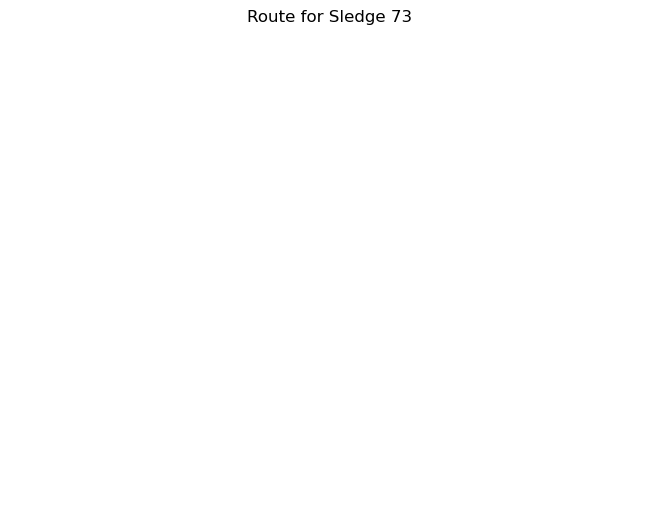

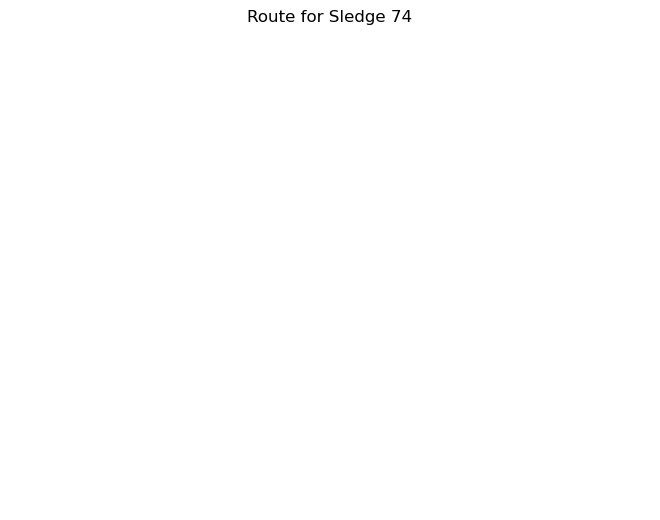

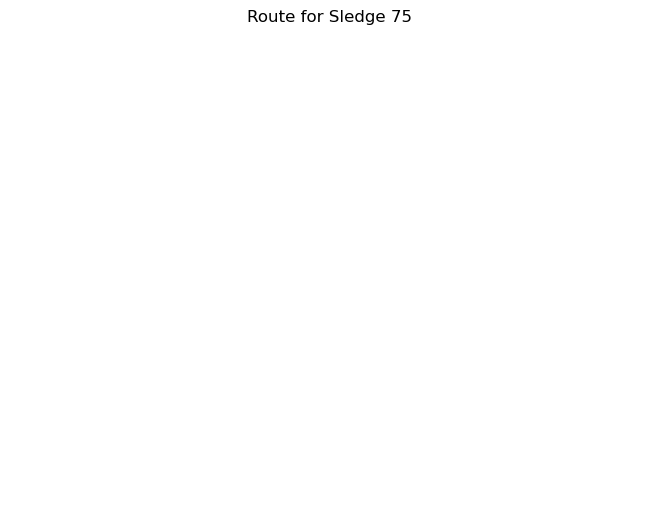

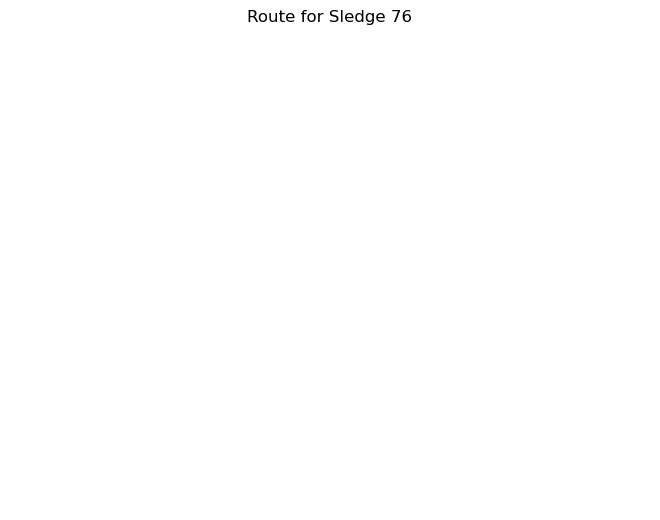

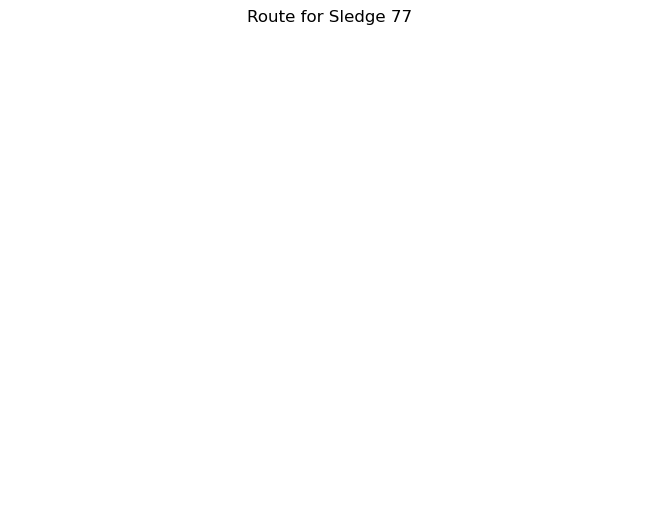

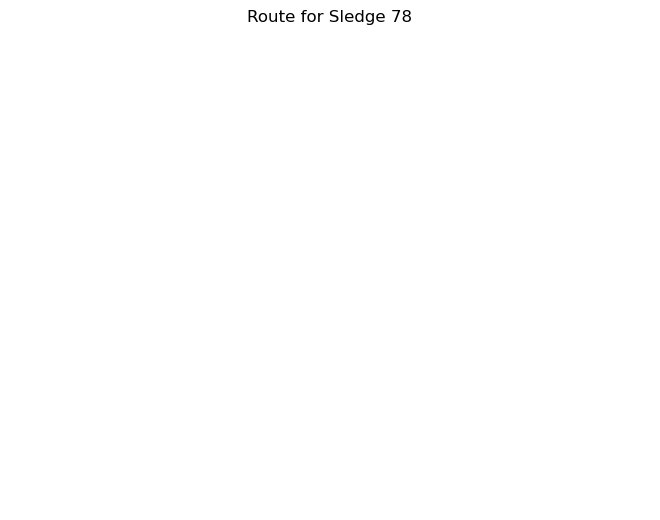

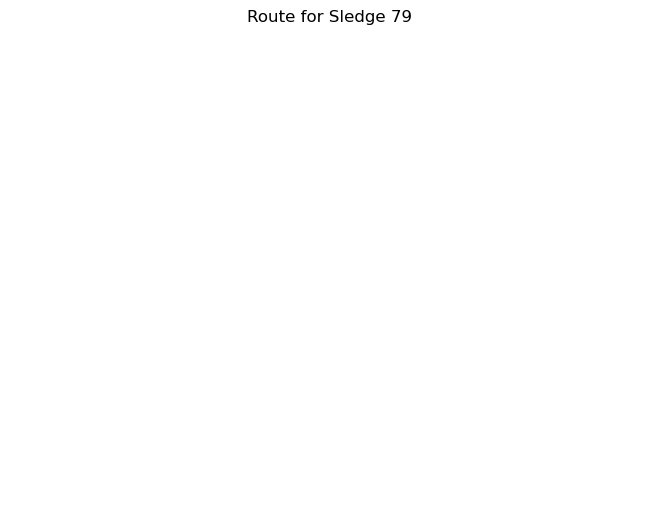

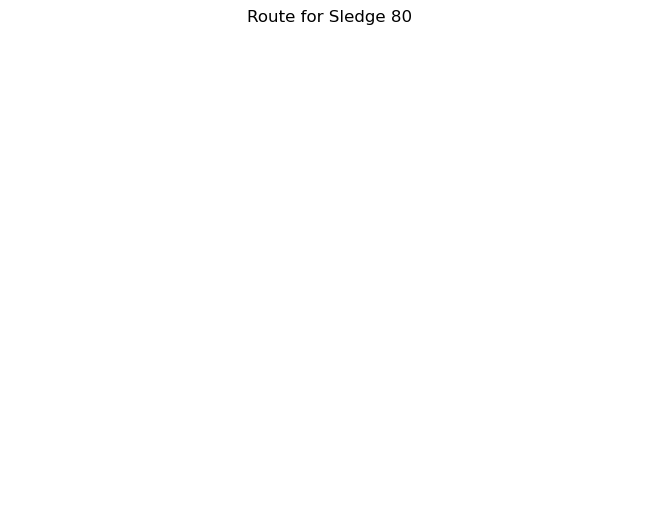

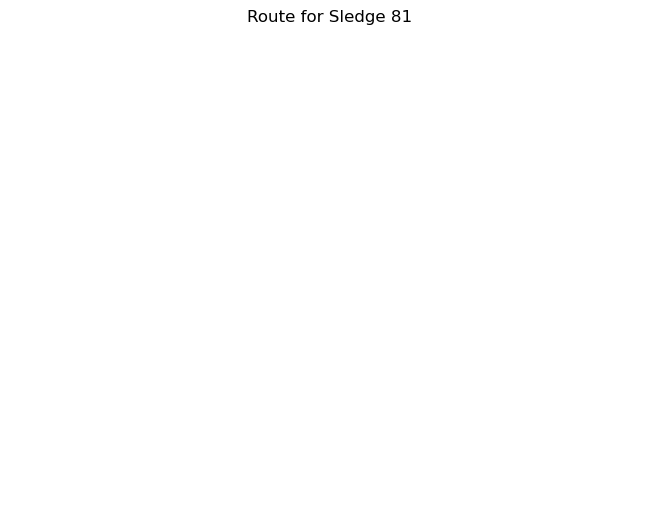

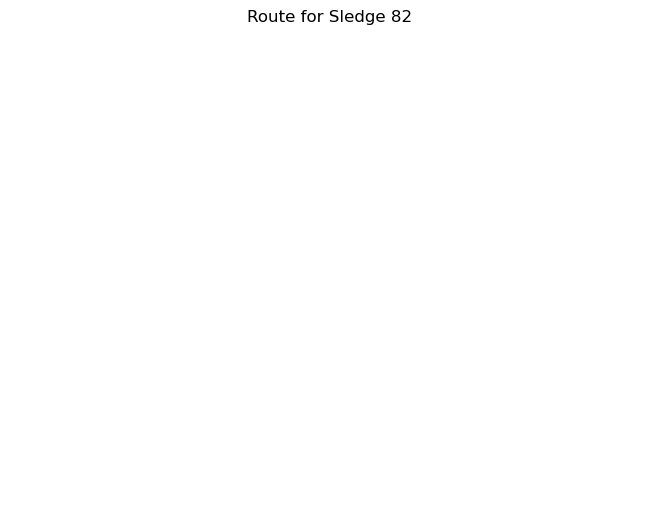

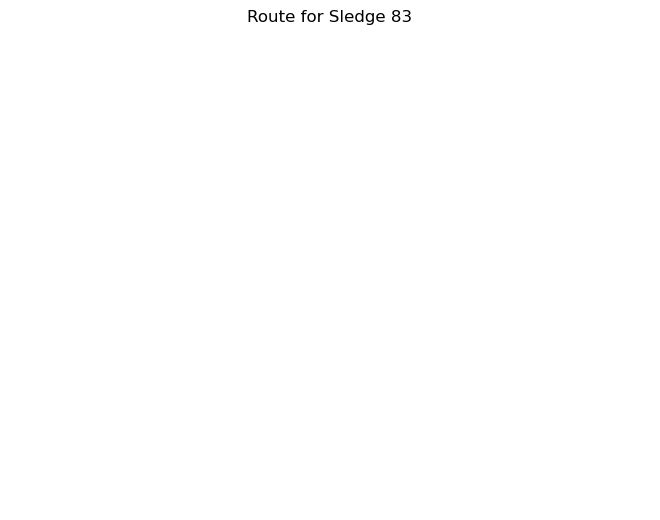

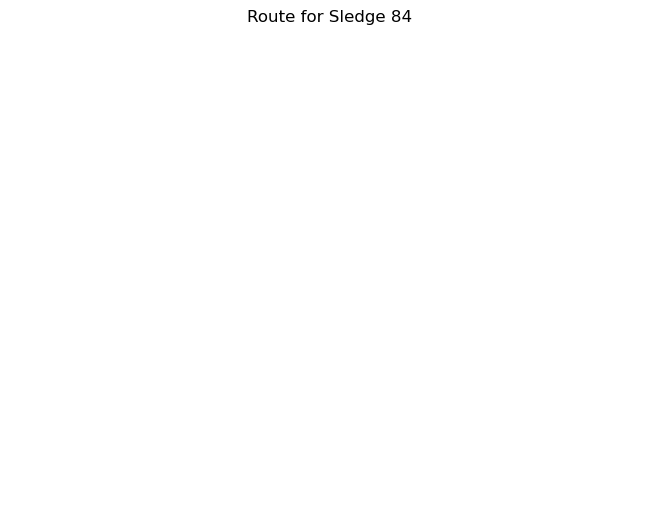

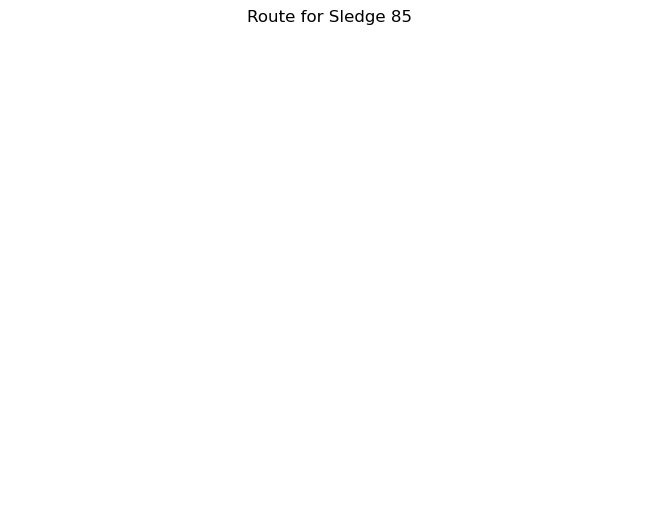

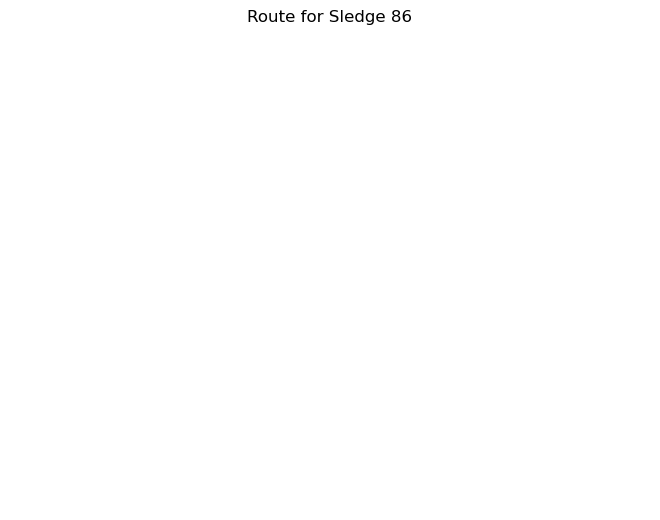

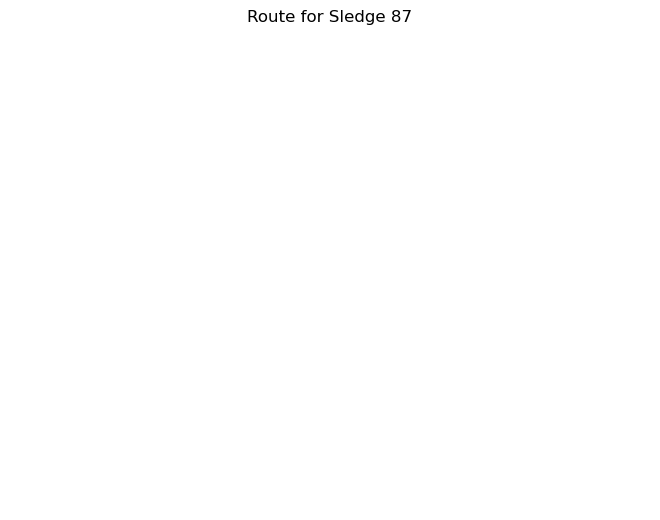

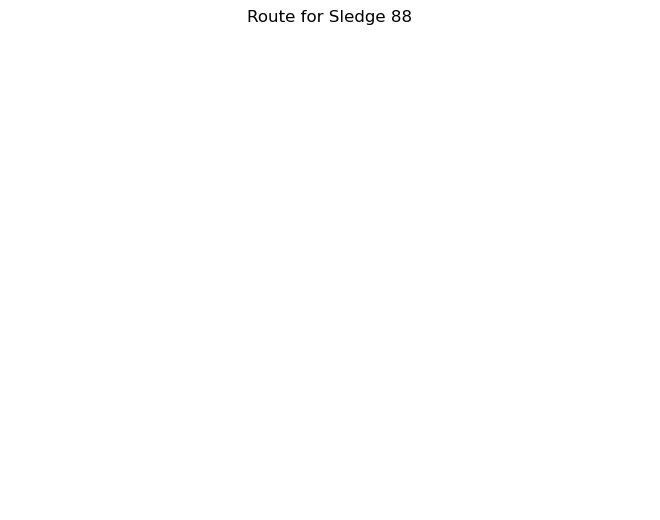

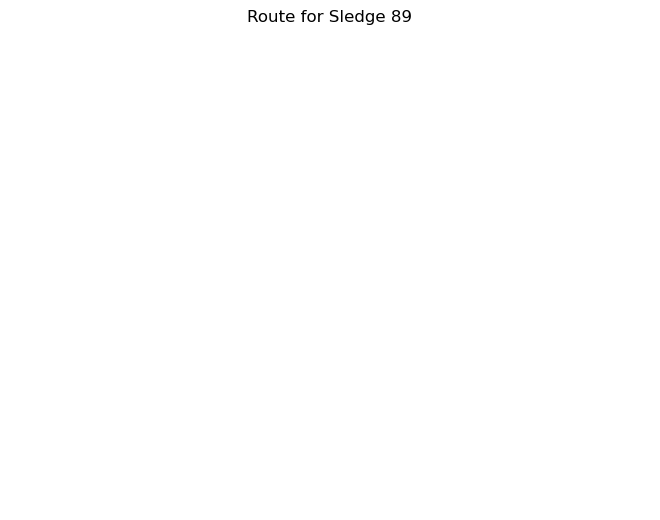

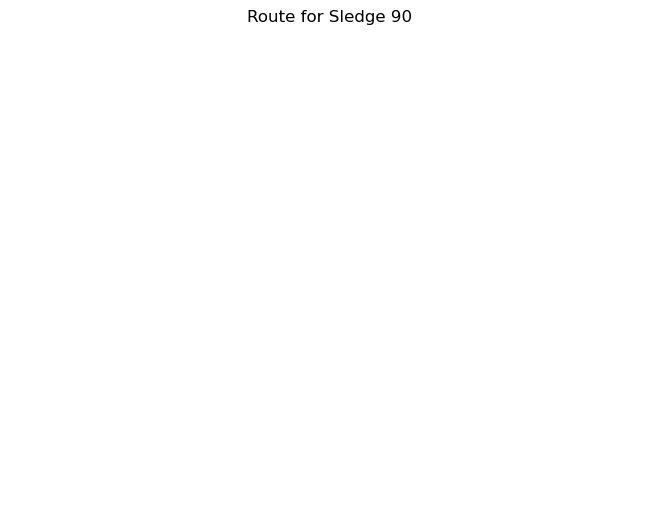

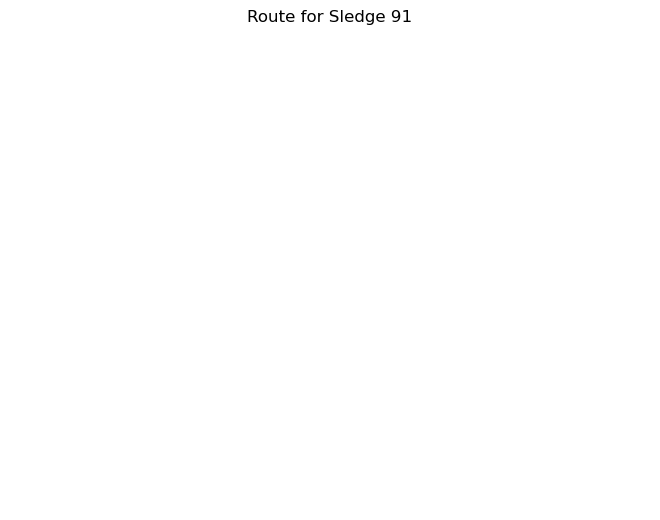

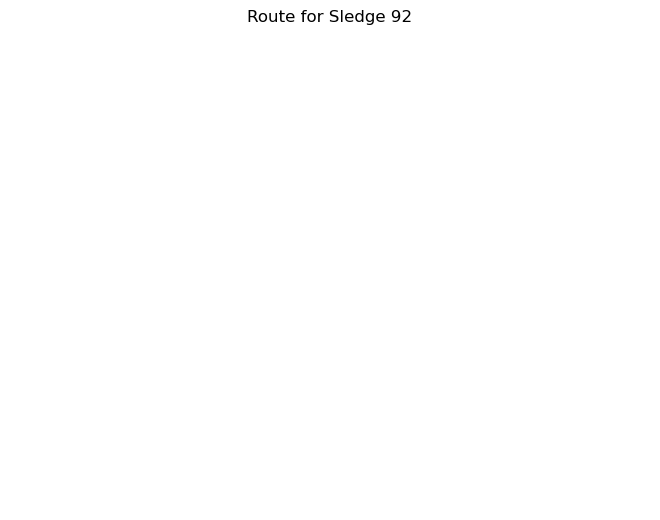

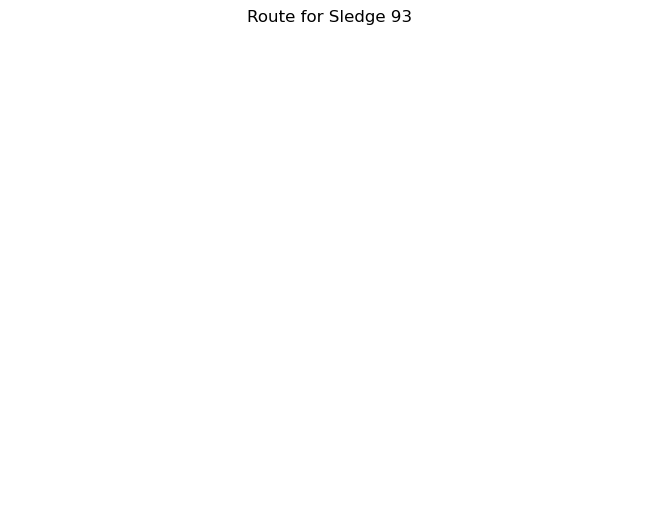

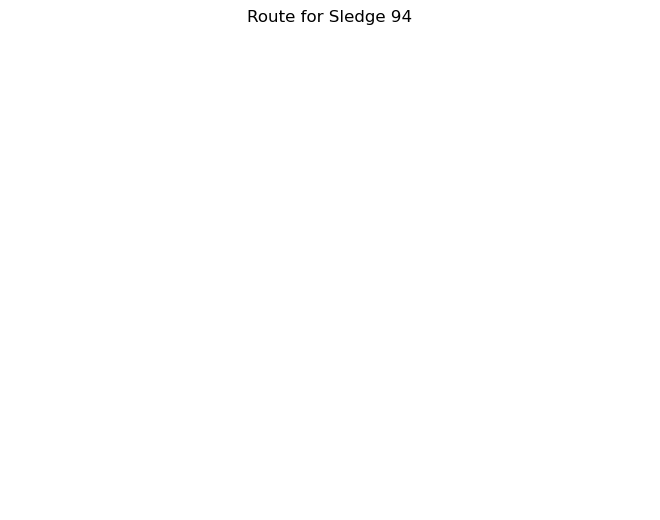

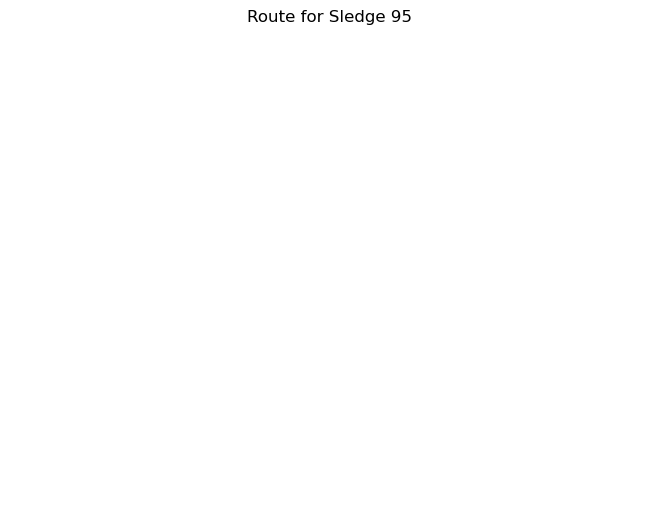

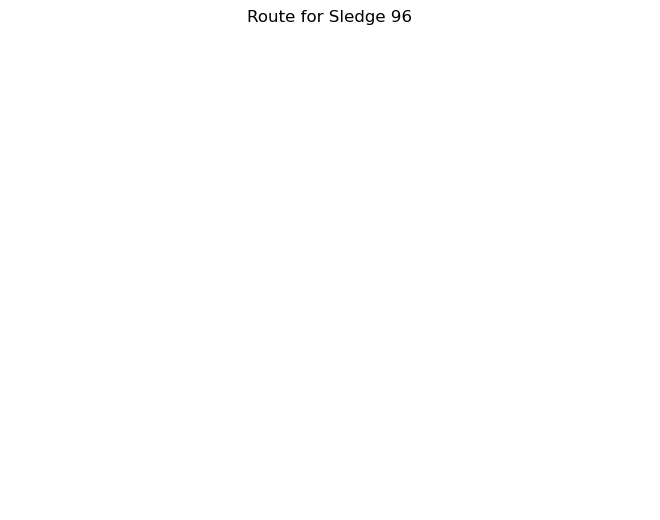

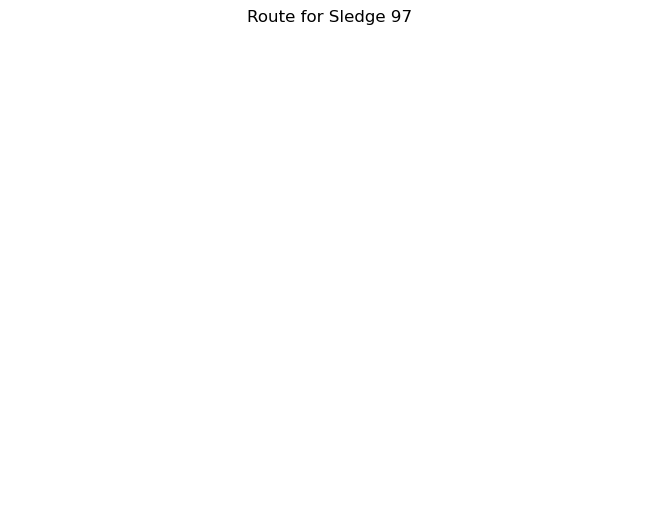

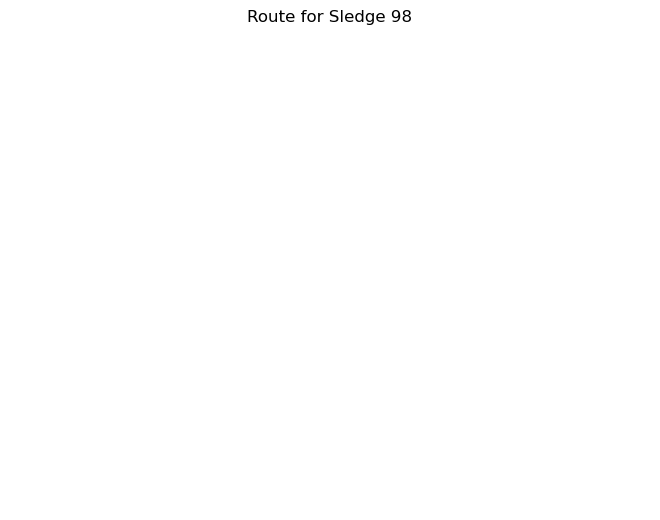

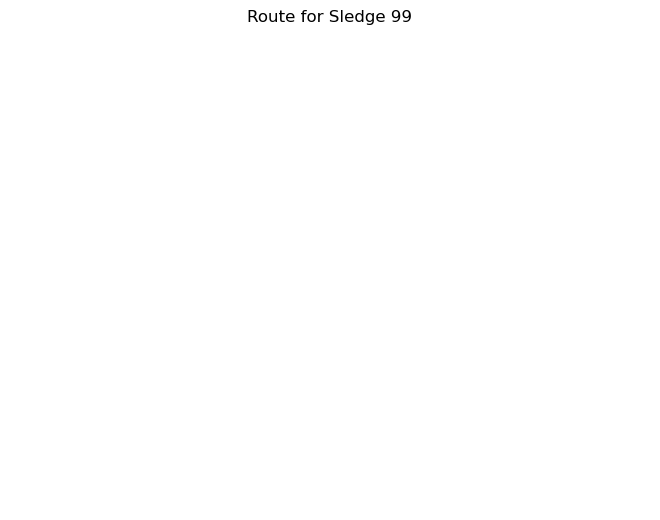

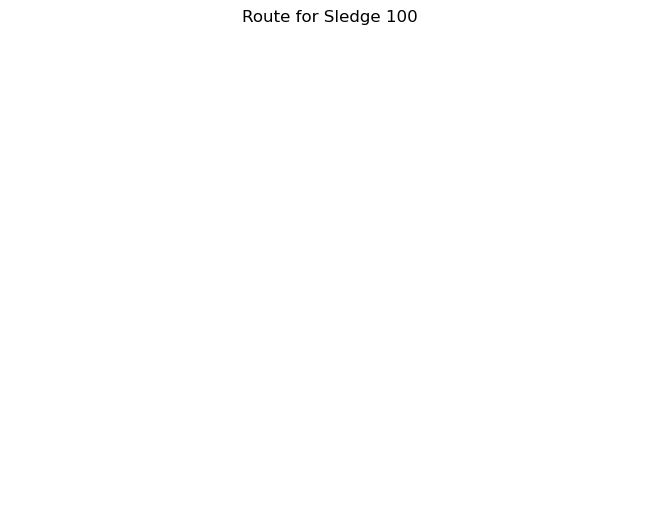

In [31]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ... [Include your Present and Sledge class definitions here] ...

# ... [Include your nearest_neighbor_route function here] ...

def plot_sledge_route(sledge, sledge_number):
    G = nx.DiGraph()
    prev_point = (0, 0)  # Assuming the sledge starts at (0, 0)
    node_colors = ["green"]  # Starting node color

    for present in sledge.pres_deliv:
        start_point = (present.starthor, present.startver)
        finish_point = (present.finhor, present.finver)

        # Add edges and nodes to the graph
        G.add_node(start_point, color='blue')  # Starting point of the delivery
        G.add_node(finish_point, color='red')  # Ending point of the delivery
        G.add_edge(prev_point, start_point)
        G.add_edge(start_point, finish_point)

        # Update the previous point and node colors
        prev_point = finish_point
        node_colors.append('blue')
        node_colors.append('red')

    # Plot the graph
    pos = nx.spring_layout(G)  # You can change layout as needed
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=10, arrows=True)
    plt.title(f"Route for Sledge {sledge_number}")
    plt.show()

# Example usage
# Read the rest of the file into a DataFrame
# df = ...

# Create sledges
# sledges = ...

# Run the nearest neighbor algorithm
# nearest_neighbor_route(df, sledges)

# Plot the routes for each sledge
for i, sledge in enumerate(sledges):
    plot_sledge_route(sledge, i + 1)
